In [1]:
import os
import numpy as np  
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from utils import draw_landmarks, draw_3D_landmarks, generate_heatmaps, calculate_pck, calculate_shift_error, calculate_mpjpe


# Overall performance Fig. 12

In [5]:
def calculate_mpjpe_add_ci(estimated_poses, ground_truth_poses):
    # estimated_poses: (batch_size, num_points, 3)
    # ground_truth_poses: (batch_size, num_points, 3)
    # reshape them to (batch_size*num_points, 3)
    estimated_poses = estimated_poses.reshape(-1, 3)
    ground_truth_poses = ground_truth_poses.reshape(-1, 3)
    errors = np.linalg.norm(estimated_poses - ground_truth_poses, axis=-1)
    # std_error = np.std(errors)/np.sqrt(len(errors))   # Standard Error
    ci_error = 1.96 * np.std(errors) / np.sqrt(len(errors))  # Confidence Interval 95%
    mpjpe = np.mean(errors)
    return mpjpe,ci_error

def check_result(check_model_name, all_files, selected_files = [], data_path='LogInference'):
    '''
    params:
    check_model_name: str, the model name to check
    all_files: list, all the tested files
    selected_files: list, the selected files to check, if not given, then all the files will be checked
    
    Return:
    mean_joints_error: float, the mean joints error
    mean_root_drift_error: float, the mean root drift error
    mpjpe: float, the mean per joint position error
    pcks: list, the percentage of correct keypoints for different errors
    pck_2cm: float, the percentage of correct keypoints for 2cm error
    pck_3cm: float, the percentage of correct keypoints for 3cm error
    per_dimention_mae: list, the mean absolute error for each dimension
    '''
    file_name = None
    for f in all_files:
        if check_model_name in f:
            file_name = f
            break
    if file_name is None:
        print(check_model_name)
        print('The model name is not found')
        return None
    result_data = pickle.load(open(os.path.join(data_path, file_name), 'rb'))
    infernece_file_name = result_data['infernece_file_name']
    failed_file_names = result_data['failed_file_names']
    predicts = result_data['predicts']
    labels = result_data['labels']
    
    selected_predicts = []
    selected_labels = []
    if len(selected_files) > 0:
        for i in range(len(infernece_file_name)):
            if infernece_file_name[i] in selected_files:
                selected_predicts.append(predicts[i])
                selected_labels.append(labels[i])
            else:
                pass
    else:
        selected_predicts = predicts
        selected_labels = labels
    
    try:
        predicts = np.concatenate(selected_predicts, axis=0) * 100 # convert to cm unit
        labels = np.concatenate(selected_labels, axis=0)* 100 # convert to cm unit
    except:
        print('The selected files are not found')
        print(selected_files)
        return None

    mean_joints_error_wo_root_drift, mean_root_drift_error = calculate_shift_error(predicts, labels)
    mpjpe, mpjpe_ci = calculate_mpjpe_add_ci(predicts, labels)
    errors = np.arange(0, 10, 0.1)
    pcks = [calculate_pck(predicts, labels, error) for error in errors]
    pck_2cm = calculate_pck(predicts, labels, 2)
    pck_3cm = calculate_pck(predicts, labels, 3)
    per_dimention_mae = np.mean(np.abs(predicts - labels),axis=0)
    per_dimention_mae = np.mean(per_dimention_mae, axis=0)
    total_mae = np.mean(np.abs(predicts - labels))
    # tatal_mae_var = np.std(np.abs(predicts - labels))/np.sqrt(len(predicts))  # Standard Error
    total_mae_ci = 1.96 * np.std(np.abs(predicts - labels)) / np.sqrt(len(predicts)) # Confidence Interval 95%
    return mean_joints_error_wo_root_drift, mean_root_drift_error, mpjpe, mpjpe_ci ,pcks, errors, pck_2cm, pck_3cm, per_dimention_mae, total_mae, total_mae_ci


data_path = 'LogInference'
files = [f for f in os.listdir(data_path) if f.endswith('pkl')]

check_model_name = '76_20242421010_tapor'
for f in files:
    if check_model_name in f:
        file_name = f
        break
print(file_name)
result_data = pickle.load(open(os.path.join(data_path, file_name), 'rb'))
infernece_file_name = result_data['infernece_file_name']
print(len(infernece_file_name))
# filter out the file name with 'U11' in the inferenece file name
infernece_file_names = [f for f in infernece_file_name if 'U11' not in f]
print(len(infernece_file_names))

tapor_type1_weights_76_20242421010_tapor.pth_202421912457_result_dict.pkl
100
98


In [17]:
# this is the list of the names of the testing files in log_inference
file_names = [
        'P1_U10_L_X_X_0.pkl',
        'P1_U10_L_X_X_1.pkl',
        'P1_U10_R_X_X_1.pkl',
        'P1_U1_L_X_X_1.pkl',
        'P1_U1_L_X_X_2.pkl',
        
        'P1_U1_R_Cover_coolwater_0.pkl',
        'P1_U1_R_Cover_coolwater_1.pkl',
        'P1_U1_R_Cover_flour_0.pkl',
        'P1_U1_R_Cover_flour_1.pkl',
        'P1_U1_R_Cover_foam_0.pkl',
        'P1_U1_R_Cover_foam_1.pkl',
        'P1_U1_R_Cover_no_0.pkl',
        'P1_U1_R_Cover_no_1.pkl',
        'P1_U1_R_Cover_oil_0.pkl',
        'P1_U1_R_Cover_oil_1.pkl',
        'P1_U1_R_Cover_warmwater_0.pkl',
        'P1_U1_R_Cover_warmwater_1.pkl',
        'P1_U1_L_thick1_0.pkl',
        'P1_U1_L_thick1_1.pkl',
        'P1_U1_L_thick1_10.pkl',
        'P1_U1_L_thick1_2.pkl',
        'P1_U1_L_thick1_3.pkl',
        'P1_U1_L_thick1_4.pkl',
        'P1_U1_L_thick1_5.pkl',
        'P1_U1_L_thick1_6.pkl',
        'P1_U1_L_thick1_7.pkl',
        'P1_U1_L_thick1_8.pkl',
        'P1_U1_L_thick1_9.pkl',
        'P1_U1_R_thick0_1.pkl',
        'P1_U1_R_thick0_10.pkl',
        'P1_U1_R_thick0_2.pkl',
        'P1_U1_R_thick0_7.pkl',
        'P1_U1_R_thick0_9.pkl',
        'P1_U1_R_thick1_0.pkl',
        'P1_U1_R_thick1_1.pkl',
        'P1_U1_R_thick1_10.pkl',
        'P1_U1_R_thick1_2.pkl',
        'P1_U1_R_thick1_3.pkl',
        'P1_U1_R_thick1_5.pkl',
        'P1_U1_R_thick1_7.pkl',
        'P1_U1_R_thick1_8.pkl',
        'P1_U1_R_thick1_9.pkl',
        
        'P1_U1_cover_medicalGlove_0.pkl',
        'P1_U1_cover_medicalGlove_1.pkl',
        'P1_U1_cover_medicalGlove_10.pkl',
        'P1_U1_cover_medicalGlove_2.pkl',
        'P1_U1_cover_medicalGlove_3.pkl',
        'P1_U1_cover_medicalGlove_4.pkl',
        'P1_U1_cover_medicalGlove_6.pkl',
        'P1_U1_cover_medicalGlove_7.pkl',
        'P1_U1_cover_medicalGlove_8.pkl',
        'P1_U1_cover_medicalGlove_9.pkl',
        'P1_UX_cover_nail_0.pkl',
        'P1_UX_cover_nail_2.pkl',
        'P1_UX_cover_nail_3.pkl',
        'P1_UX_cover_nail_4.pkl',
        'P1_UX_cover_nail_6.pkl',
        'P1_UX_cover_nail_7.pkl',
        
        'P1_U1_R_Dist_Dist_0.pkl',
        'P1_U1_R_Dist_Dist_1.pkl',
        'P1_U1_R_LightCond0_X_0.pkl',
        'P1_U1_R_LightCond0_X_1.pkl',
        'P1_U1_R_LightCond1_X_0.pkl',
        'P1_U1_R_LightCond1_X_1.pkl',
        'P1_U1_R_LightCond2_X_0.pkl',
        'P1_U1_R_LightCond2_X_1.pkl',
        'P1_U1_R_LightCond3_X_0.pkl',
        'P1_U1_R_LightCond3_X_1.pkl',
        'P1_U1_R_X_X_1.pkl',
        'P1_U2_R_Cover_glove_1.pkl',
        'P1_U1_R_Cover_ring_0.pkl',
        'P1_U1_R_Cover_ring_1.pkl',
        
        'P1_U2_R_Cover_coolwater_0.pkl',
        'P1_U2_R_Cover_coolwater_1.pkl',
        'P1_U2_R_Cover_flour_0.pkl',
        'P1_U2_R_Cover_flour_1.pkl',
        'P1_U2_R_Cover_foam_0.pkl',
        'P1_U2_R_Cover_foam_1.pkl',
        'P1_U2_R_Cover_no_0.pkl',
        'P1_U2_R_Cover_no_1.pkl',
        'P1_U2_R_Cover_oil_0.pkl',
        'P1_U2_R_Cover_oil_1.pkl',
        'P1_U2_R_Cover_warmwater_0.pkl',
        'P1_U2_R_Cover_warmwater_1.pkl',
        'P1_U2_R_Dist_Dist_0.pkl',
        'P1_U2_R_Dist_Dist_1.pkl',
        'P1_U2_R_Dist_Dist_2.pkl',
        'P1_U2_R_LightCond0_X_0.pkl',
        'P1_U2_R_LightCond0_X_1.pkl',
        'P1_U2_R_LightCond1_X_0.pkl',
        'P1_U2_R_LightCond1_X_1.pkl',
        'P1_U2_R_LightCond2_X_0.pkl',
        'P1_U2_R_LightCond2_X_1.pkl',
        'P1_U2_R_LightCond3_X_0.pkl',
        'P1_U2_R_LightCond3_X_1.pkl',
        
        'P1_U2_R_X_X_0.pkl',
        'P1_U2_R_X_X_1.pkl',
        'P1_U2_R_X_X_2.pkl',
        'P1_U3_L_X_X_1.pkl',
        'P1_U3_R_X_X_0.pkl',
        'P1_U4_L_X_X_0.pkl',
        'P1_U4_R_X_X_0.pkl',
        'P1_U5_R_X_X_0.pkl',
        'P1_U5_R_X_X_1.pkl',
        'P1_U6_L_X_X_0.pkl',
        'P1_U6_L_X_X_1.pkl',
        'P1_U6_R_X_X_0.pkl',
        'P1_U6_R_X_X_1.pkl',
        'P1_U7_L_X_X_1.pkl',
        'P1_U8_L_X_X_0.pkl',
        'P1_U8_R_X_X_0.pkl',
        'P1_U8_R_X_X_1.pkl',
        'P1_U9_R_X_X_0.pkl',
        
        'P2_U1_L_X_X_0.pkl',
        'P2_U1_L_X_X_2.pkl',
        'P2_U1_R_X_X_0.pkl',
        'P2_U2_L_X_X_0.pkl',
        'P2_U2_L_X_X_1.pkl',
        'P2_U2_L_X_X_2.pkl',
        'P2_U2_R_X_X_1.pkl',
        'P2_U2_R_X_X_2.pkl',
        'P3_U1_L_X_X_1.pkl',
        'P3_U1_L_X_X_2.pkl',
        'P3_U1_R_X_X_0.pkl',
        'P3_U1_R_X_X_1.pkl',
        'P3_U1_R_X_X_2.pkl',
        'P5_U1_L_X_X_0.pkl',
        'P5_U1_L_X_X_1.pkl',
        'P5_U1_L_X_X_2.pkl',
        'P5_U1_R_X_X_0.pkl',
        'P5_U1_R_X_X_1.pkl',
        'P5_U2_L_X_X_0.pkl',
        'P5_U2_L_X_X_1.pkl',
        'P5_U2_L_X_X_2.pkl',
        'P5_U2_R_X_X_0.pkl',
        'P5_U2_R_X_X_1.pkl',
        'P5_U2_R_X_X_2.pkl',
        
        'P6_U1_R_X_X_2.pkl',
        'P6_U1_L_X_X_1.pkl',
        'P6_U1_L_X_X_0.pkl',
        'P6_U1_R_X_X_1.pkl',
        ]

print(len(file_names))

141


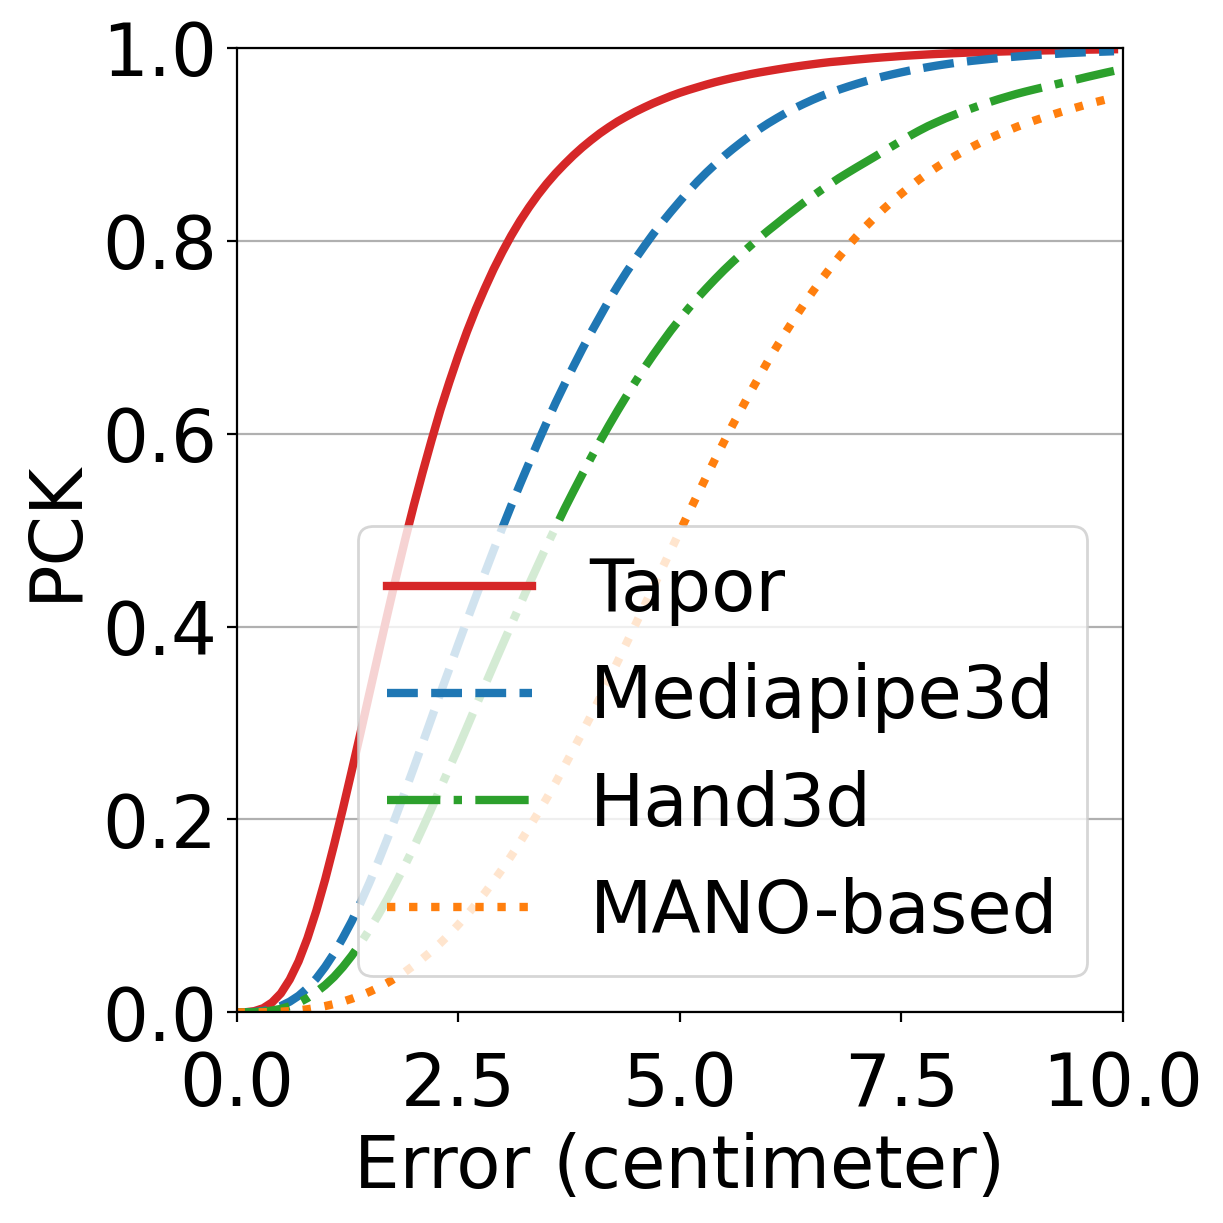

---------------------------------
model name:  Tapor
mpjpe:  2.2636375
mae per dimention:  [0.79680985 1.0189079  1.5041088 ]
pck_4cm:  0.9041359599395313
pck_error_4cm:  4.0
FLOPS:  244429464.0
Number of parameters:  691000.0
---------------------------------
---------------------------------
model name:  Mediapipe3d
mpjpe:  3.31962
mae per dimention:  [1.2808063 1.4917866 2.1572688]
pck_4cm:  0.7047981229528849
pck_error_4cm:  4.0
FLOPS:  385814784.0
Number of parameters:  2013425.0
---------------------------------
---------------------------------
model name:  Hand3d
mpjpe:  4.113673
mae per dimention:  [2.0392215 1.4212719 2.4231892]
pck_4cm:  0.5750169280675234
pck_error_4cm:  4.0
FLOPS:  30103765504.0
Number of parameters:  18961214.0
---------------------------------
---------------------------------
model name:  MANO-based
mpjpe:  5.368107
mae per dimention:  [3.1237829 2.6008801 2.3276498]
pck_4cm:  0.3078408446712018
pck_error_4cm:  4.0
FLOPS:  277686736.0
Number of paramete

In [9]:
# python traintest.py -m tapor -e 200 -b 48 -fs 1 -ms 0 -t 0 -lr 0.0001 -hm 0 -fo 1 -s 0 -mt 1 -ls jb -tqdm 1 >> LogRuningState/77_tapor1_loss_jb.log 2>&1 &
# python traintest.py -m mediapipe -e 200 -b 64 -fs 1 -ms 256 -t 0 -lr 0.001 -hm 0 -fo 0 -s 2 >> LogRuningState/20_mediapipe.log 2>&1 & 
# python traintest.py -m baseline3d -wp 22_202411610248_baseline3d.pth -e 200 -b 64 -fs 1 -ms 200 -t 0 -lr 0.00001 -hm 1 -fo 1 -s 3 >> LogRuningState/23_baseline3d.log 2>&1 &
# python traintest.py -m mano -e 200 -b 64 -fs 1 -ms 200 -t 0 -lr 0.0001 -hm 0 -fo 1 -s 0 >> LogRuningState/35_mano.log 2>&1 &

compare_loss_models = ['77_20242421040_tapor.pth_202431124637',
                       '20_2024115191634_mediapipe', 
                       '23_2024116124324_baseline3d',
                       '35_2024117143915_mano', ]

result_dict = {}
for check_model_name in compare_loss_models:
    mean_joints_error_wo_root_drift, mean_root_drift_error, mpjpe,\
        mpjpe_var ,pcks, errors, pck_2cm, pck_3cm, per_dimention_mae,\
            total_mae, tatal_mae_var = check_result(check_model_name, files, infernece_file_names)
    result_dict[check_model_name] = {
        'mean_joints_error_wo_root_drift': mean_joints_error_wo_root_drift, 
        'mean_root_drift_error': mean_root_drift_error, 
        'mpjpe': mpjpe,
        'mpjpe_var': mpjpe_var,
        'pcks': pcks, 
        'errors': errors, 
        'pck_2cm': pck_2cm,
        'pck_3cm': pck_3cm, 
        'per_dimention_mae': per_dimention_mae,
        'total_mae': total_mae,
        'tatal_mae_var': tatal_mae_var,
        }
x_labels = [ 'Tapor', 'Mediapipe3d', 'Hand3d', 'MANO-based', ] 

mpjpe_list = []
mpjpe_var_list = []
for key in result_dict.keys():
    mpjpe_list.append(result_dict[key]['mpjpe'])
    mpjpe_var_list.append(result_dict[key]['mpjpe_var'])


# draw the pck curves of all three models
linestyles = ['-', '--', '-.', ':']
colors = [ 'tab:red', 'tab:blue', 'tab:green', 'tab:orange']
plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
for i, key in enumerate(result_dict.keys()):
    plt.plot(result_dict[key]['errors'], result_dict[key]['pcks'], label=  x_labels[i], linewidth=3, color = colors[i], linestyle = linestyles[i])
plt.ylim(0, 1)
plt.xlim(0,10)
plt.xlabel('Error (centimeter)')
plt.ylabel('PCK')
# set the pad of the x ticks label
plt.tick_params(axis='x', pad=10)  # Increase labelpad value to increase the gap

# plt.title('PCK curve')
plt.grid(axis='y')
plt.legend()
# plt.savefig("figures/new_compare_" +'model_pck_curve'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'model_pck_curve' +'.pdf')
plt.show()


# from Inspection.ipynb: 
# x_labels = [ 'Tapor', 'Mediapipe3d', 'Hand3d', 'MANO-based', ] 
model_param_number = [691000.00, 2013425.00, 18961214.00, 2288627.00]
model_flops = [244429464.00, 385814784.00, 30103765504.00, 277686736.00]
model_names = ['Tapor', 'Mediapipe3d', 'Hand3d', 'MANO-based', ]

for i, key in enumerate(result_dict.keys()):
    print('---------------------------------')
    # print(key+': ')
    print('model name: ', model_names[i])
    print('mpjpe: ', result_dict[key]['mpjpe'])
    print('mae per dimention: ', result_dict[key]['per_dimention_mae'])
    errors = result_dict[key]['errors']
    pcks = result_dict[key]['pcks']
    print('pck_4cm: ', pcks[40])
    print('pck_error_4cm: ', errors[40])
    print('FLOPS: ', model_flops[i])
    print('Number of parameters: ', model_param_number[i])
    print('---------------------------------')


# Figure 13 and Figure 23

## (a) Latency across devices.

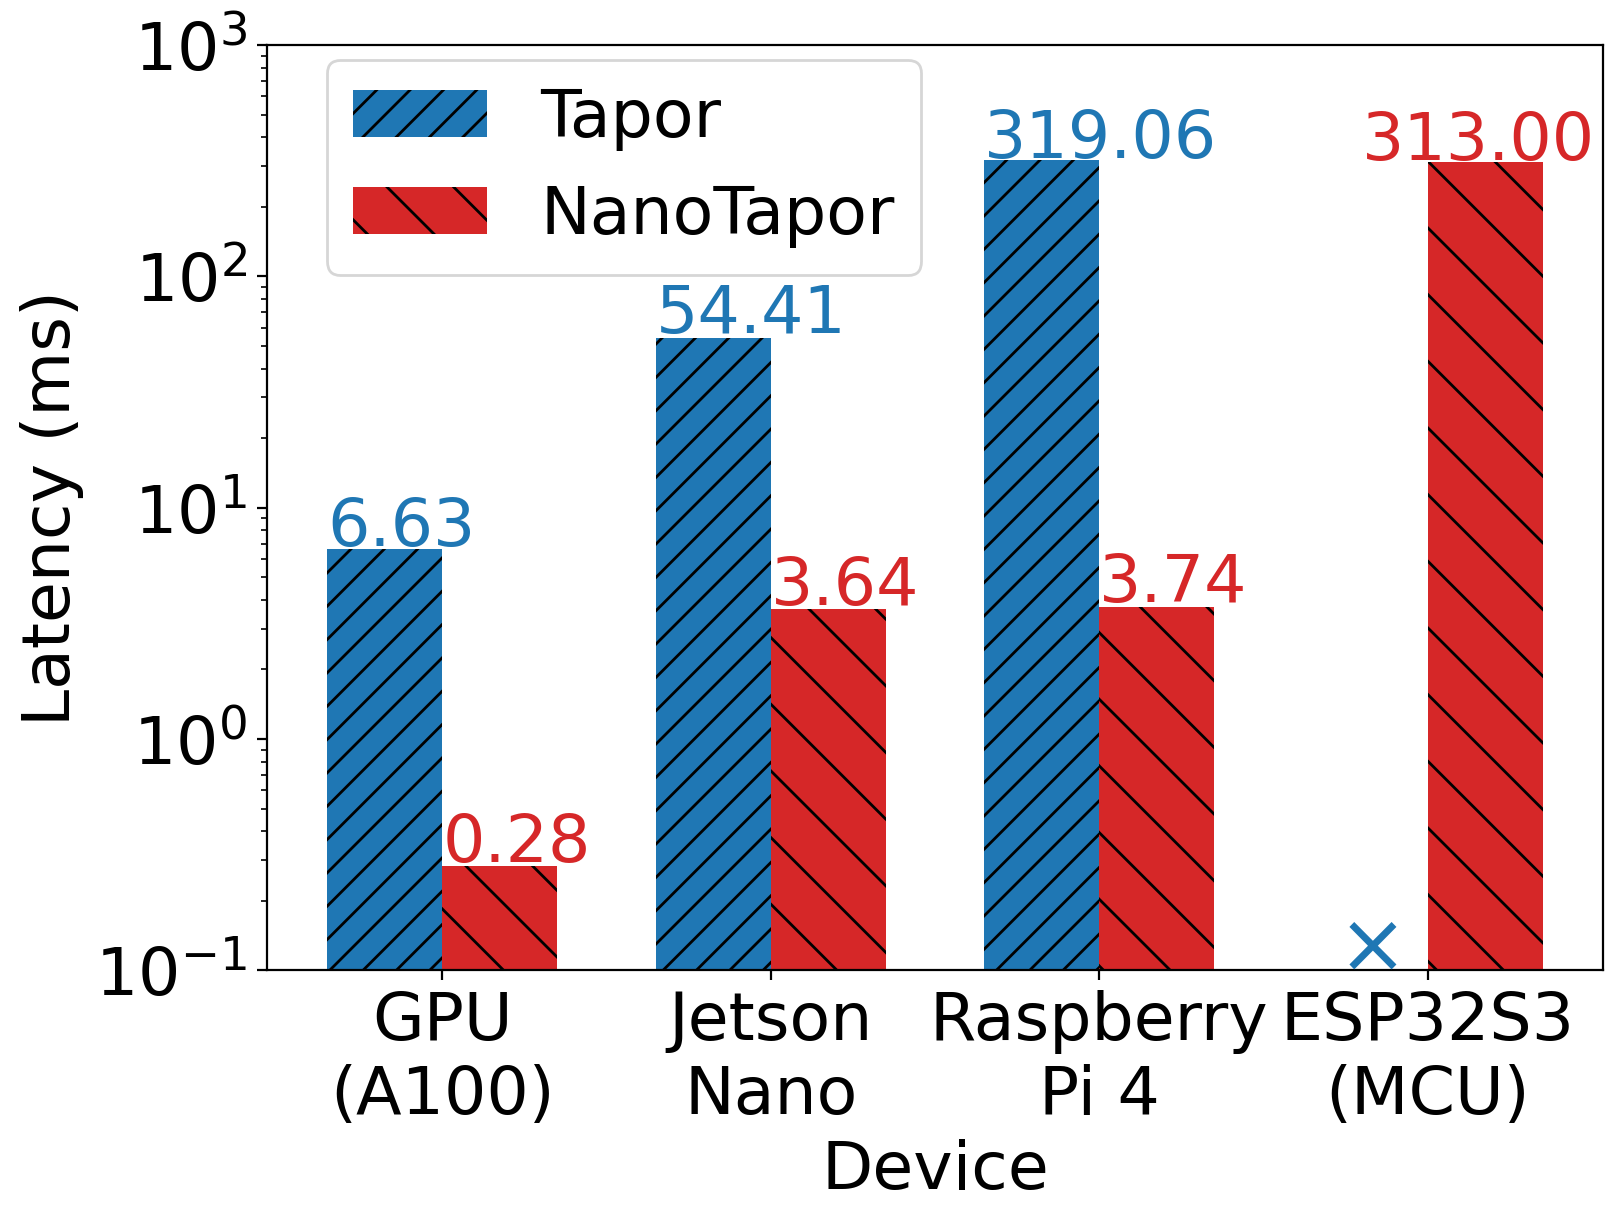

In [10]:
devices = ['GPU\n(A100)', 'Jetson\nNano', 'Raspberry\nPi 4', 'ESP32S3\n(MCU)']

# the following results are measured by the authors
edgetapor_latency = [0.2840, 3.637, 3.7398, 313]
tapor_latency = [6.6340, 54.4056, 319.0622, 0]

# draw the latency comparison bar chart
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (8,6),dpi=200, layout='constrained')

barWidth = 0.35
r1 = np.arange(len(edgetapor_latency))
r2 = [x + barWidth for x in r1]
plt.bar(r1, tapor_latency, color='tab:blue', width=barWidth, label='Tapor', hatch='//')
# put the number on the top of the bar
shift1 = [0.21, 3, 8, 0.1]
for i in range(len(r1)-1):
    plt.text(r1[i]-barWidth/2, tapor_latency[i]+shift1[i], f'{tapor_latency[i]:.2f}', color='tab:blue', fontsize=24)
# put the number on the top of the bar
shift2 = [0.01, 0.18, 0.18, 6]
x_shift = [0., 0., 0., 0.2]
for i in range(len(r2)):
    plt.text(r2[i]-barWidth/2 - x_shift[i], edgetapor_latency[i]+shift2[i], f'{edgetapor_latency[i]:.2f}', color='tab:red', fontsize=24)
plt.bar(r2, edgetapor_latency, color='tab:red', width=barWidth, label='NanoTapor', hatch='\\')
# put a red cross on the last bar of tapor
plt.text(r1[-1]-0.1, tapor_latency[-1]+0.1, r'$\times$', color='tab:blue', fontsize=30)
plt.xlabel('Device')
plt.ylabel('Latency (ms)')
# plt.ylim(0,2)
# using log scale on y-axis
plt.yscale('log')
plt.xticks([r + barWidth/2 for r in range(len(tapor_latency))], devices)
# plt.legend(loc='upper left')
# make the legend upper a little bit
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 1.02))
plt.ylim(0.1, 1000)
# set the x-axis limit
# plt.xlim(-0.5, 3.9)
# plt.savefig("figures/" +'latency_tapor_edgetapor'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/"+'latency_tapor_edgetapor' +'.pdf')
plt.show()


## (b) Gesture recognition f1 score and fusion matrix

### Tapor results

dict_keys(['test_labels', 'test_predicted'])
(5472,)
(5472,)
[[782   1   1   1   1   0   0]
 [  0 708  49  26   9  11   1]
 [  0  18 773   5   0   1   0]
 [  0  13   0 742  34   1   0]
 [  0   1   0  13 732   1   0]
 [  0   6   0   3   6 750  30]
 [  0   0   0   0   0   3 750]]


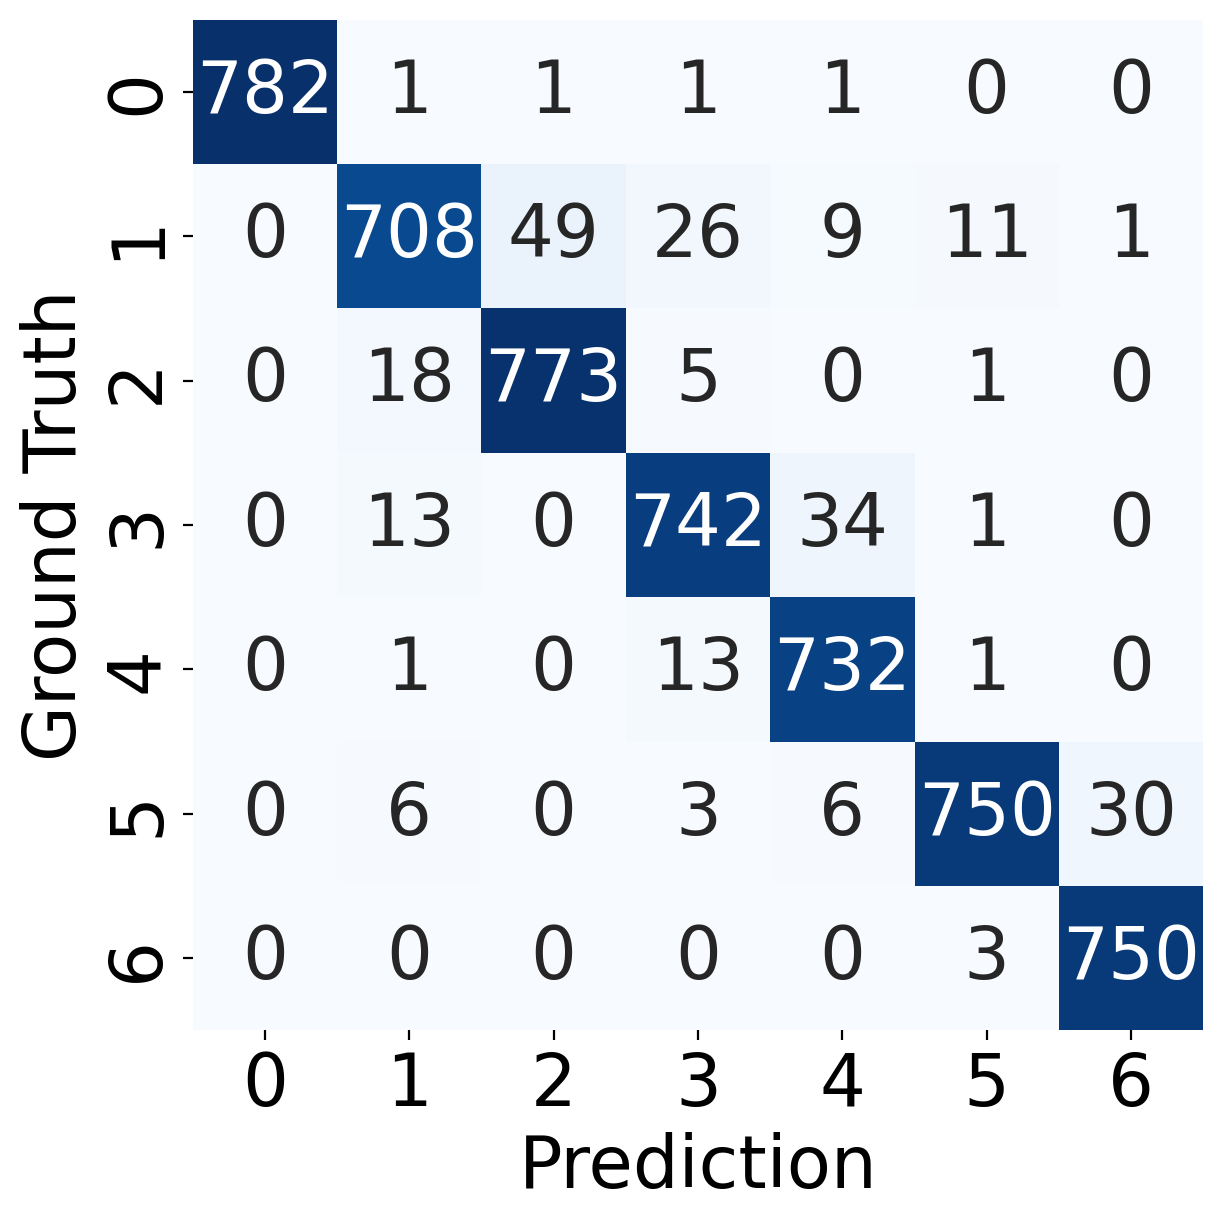

              precision    recall  f1-score   support

    gesture0       1.00      0.99      1.00       786
    gesture1       0.95      0.88      0.91       804
    gesture2       0.94      0.97      0.95       797
    gesture3       0.94      0.94      0.94       790
    gesture4       0.94      0.98      0.96       747
    gesture5       0.98      0.94      0.96       795
    gesture6       0.96      1.00      0.98       753

    accuracy                           0.96      5472
   macro avg       0.96      0.96      0.96      5472
weighted avg       0.96      0.96      0.96      5472

accuracy:  0.9570540935672515


In [11]:
# python gesture_recognition_traintest.py -wp "77_20242421040_tapor.pth" -fs 1 -ms 0 -mt 1 -ev 4 -ptm 1 -lr 0.0001 -bs 32 -ep 250 -dd 0
result_path = "gesture_logs/14_20243410756.pkl"
result = pickle.load(open(result_path, "rb"))
print(result.keys())

test_labels = result['test_labels']
test_preds = result['test_predicted']

print(test_labels.shape)
print(test_preds.shape)

# all the test_labels add 1, and then change the 7 to 0
test_labels = test_labels + 1
test_labels[test_labels==7] = 0

test_preds = test_preds + 1
test_preds[test_preds==7] = 0

# using the confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, test_preds)
print(cm)


df_cm = pd.DataFrame(cm, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"],
                )

plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
s = sns.heatmap(df_cm, annot=True, cmap="Blues", square=True, fmt='g', cbar=False, cbar_kws={"shrink": 0.78}, ax=ax) 
s.set(xlabel='Prediction', ylabel='Ground Truth')  

# set the color bar label
# plt.savefig("figures/case_study_" +'gesture_reco_all'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/case_study_"+'gesture_reco_all' +'.pdf')
 
plt.show()

# print other metrics
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_preds, target_names=["gesture0","gesture1","gesture2","gesture3","gesture4","gesture5","gesture6"]))
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(test_labels, test_preds))

### NanoTapor results

dict_keys(['test_labels', 'test_predicted'])
(5472,)
(5472,)
[[794   1   0   2   0   0   0]
 [  0 610  60  27  17  18   5]
 [  0  43 760   9   8   4   2]
 [  0  24  10 654  64   5   1]
 [  0  18   8  87 643   3   4]
 [  0  46  10   0  16 698  35]
 [  0   7   3   1   6  59 710]]


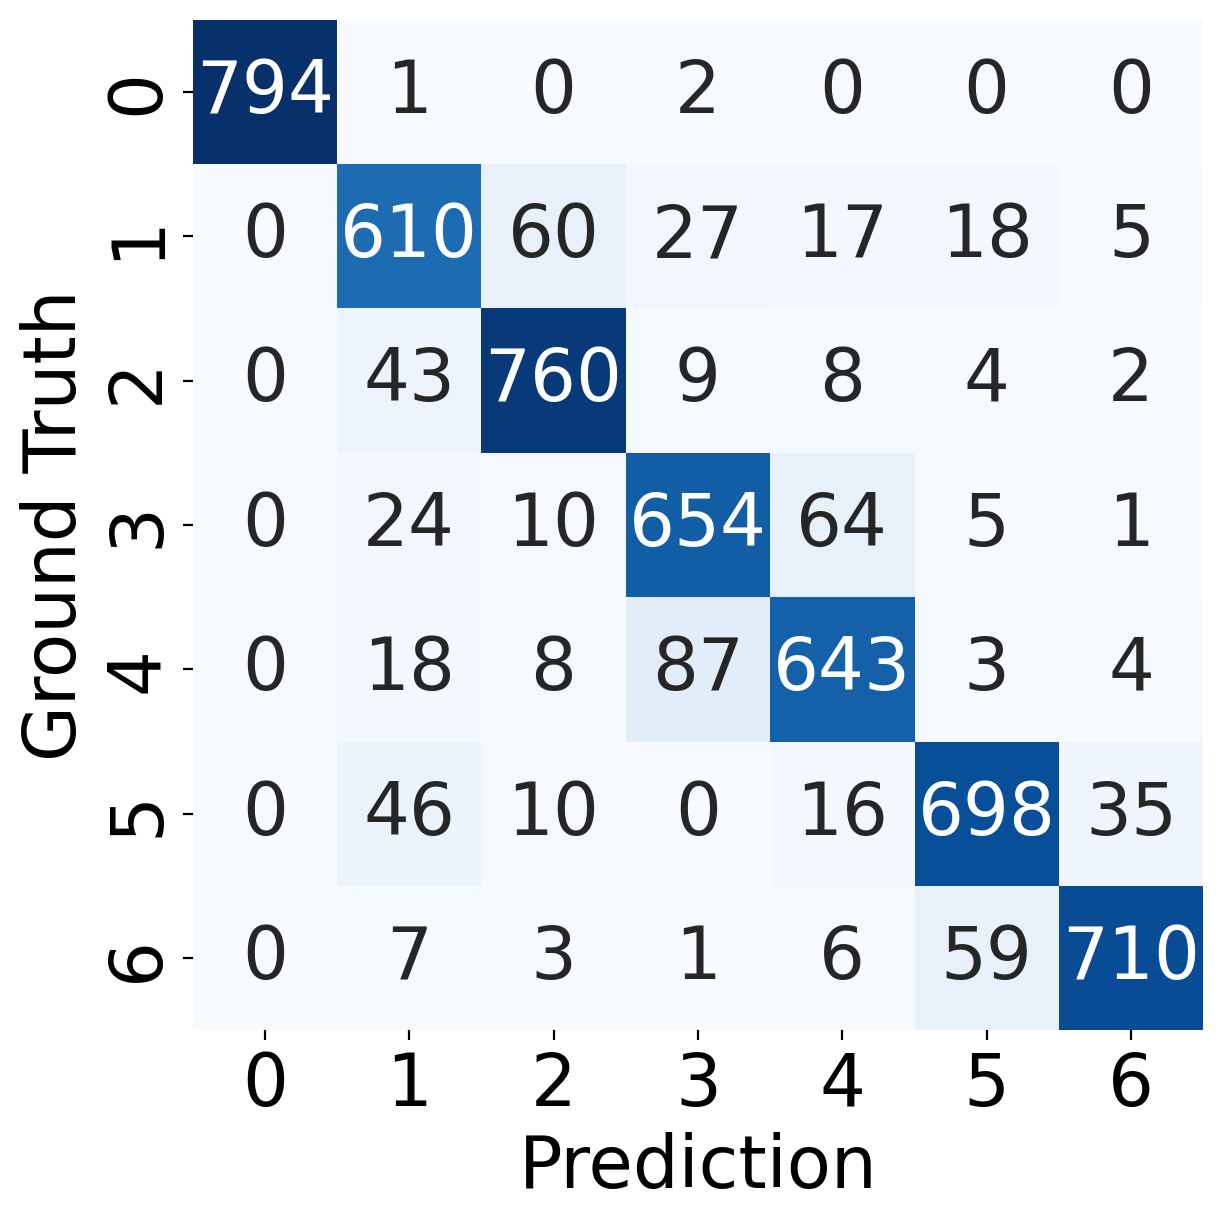

              precision    recall  f1-score   support

    gesture0       1.00      1.00      1.00       797
    gesture1       0.81      0.83      0.82       737
    gesture2       0.89      0.92      0.91       826
    gesture3       0.84      0.86      0.85       758
    gesture4       0.85      0.84      0.85       763
    gesture5       0.89      0.87      0.88       805
    gesture6       0.94      0.90      0.92       786

    accuracy                           0.89      5472
   macro avg       0.89      0.89      0.89      5472
weighted avg       0.89      0.89      0.89      5472

accuracy:  0.8898026315789473


In [12]:
# python gesture_recognition_traintest.py -wp "77_20242421040_tapor.pth" -fs 1 -ms 0 -mt 1 -ev 4 -ptm 1 -lr 0.0001 -bs 32 -ep 250 -dd 0
result_path = "gesture_logs/15_edgeTapor_202437165213.pkl"
result = pickle.load(open(result_path, "rb"))
print(result.keys())

test_labels = result['test_labels']
test_preds = result['test_predicted']

print(test_labels.shape)
print(test_preds.shape)

# all the test_labels add 1, and then change the 7 to 0
test_labels = test_labels + 1
test_labels[test_labels==7] = 0

test_preds = test_preds + 1
test_preds[test_preds==7] = 0

# using the confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, test_preds)
print(cm)


df_cm = pd.DataFrame(cm, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"],
                )

plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
s = sns.heatmap(df_cm, annot=True, cmap="Blues", square=True, fmt='g', cbar=False, cbar_kws={"shrink": 0.78}, ax=ax) 
s.set(xlabel='Prediction', ylabel='Ground Truth')  

# plt.savefig("figures/case_study_" +'gesture_reco_all_edge_tapor'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/case_study_"+'gesture_reco_all_edge_tapor' +'.pdf')
 
plt.show()

# print other metrics
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_preds, target_names=["gesture0","gesture1","gesture2","gesture3","gesture4","gesture5","gesture6"]))
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(test_labels, test_preds))


### The comparison between Tapor and NanoTapor

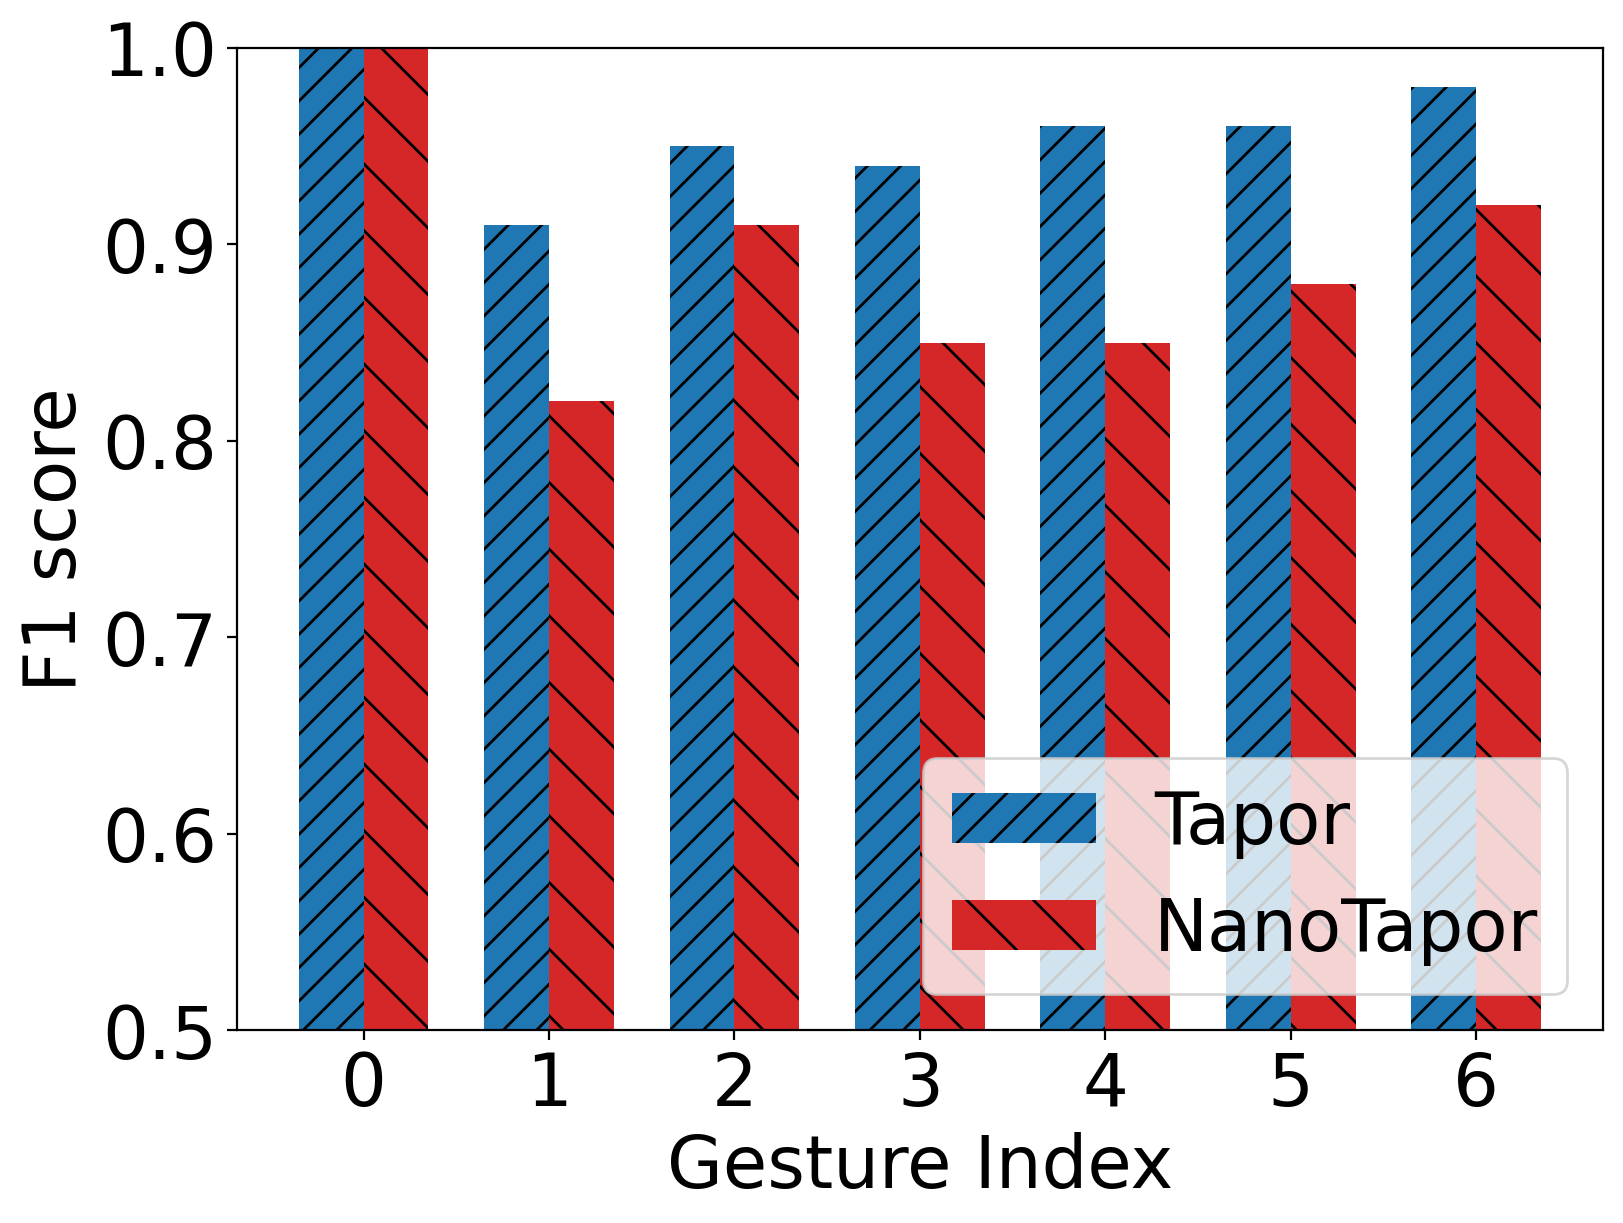

In [13]:
import matplotlib.pyplot as plt
# the following results are obtained from the above two sections
f1_scores_edge = [1.00, 0.82, 0.91, 0.85, 0.85,0.88,0.92 ]
f1_scores = [1.00, 0.91, 0.95, 0.94, 0.96,0.96,0.98]
gestures = ["0","1","2","3","4","5","6"]

# draw the bar chart to compare the two models
plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(figsize = (8,6),dpi=200, layout='constrained')
barWidth = 0.35
r1 = np.arange(len(f1_scores))
r2 = [x + barWidth for x in r1]
plt.bar(r1, f1_scores, color='tab:blue', width=barWidth, label='Tapor', hatch='//')
plt.bar(r2, f1_scores_edge, color='tab:red', width=barWidth, label='NanoTapor', hatch='\\')
plt.xlabel('Gesture Index')
plt.ylabel('F1 score')
plt.ylim(0.5,1)
plt.xticks([r + barWidth/2 for r in range(len(f1_scores))], gestures)
plt.legend(loc='lower right')
# plt.title('F1 score for each gesture')
# plt.savefig("figures/case_study_" +'gesture_reco_f1_all_compare'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/case_study_"+'gesture_reco_f1_all_compare' +'.pdf')
plt.show()


# Fig. 14. Tapor performance on different users

10


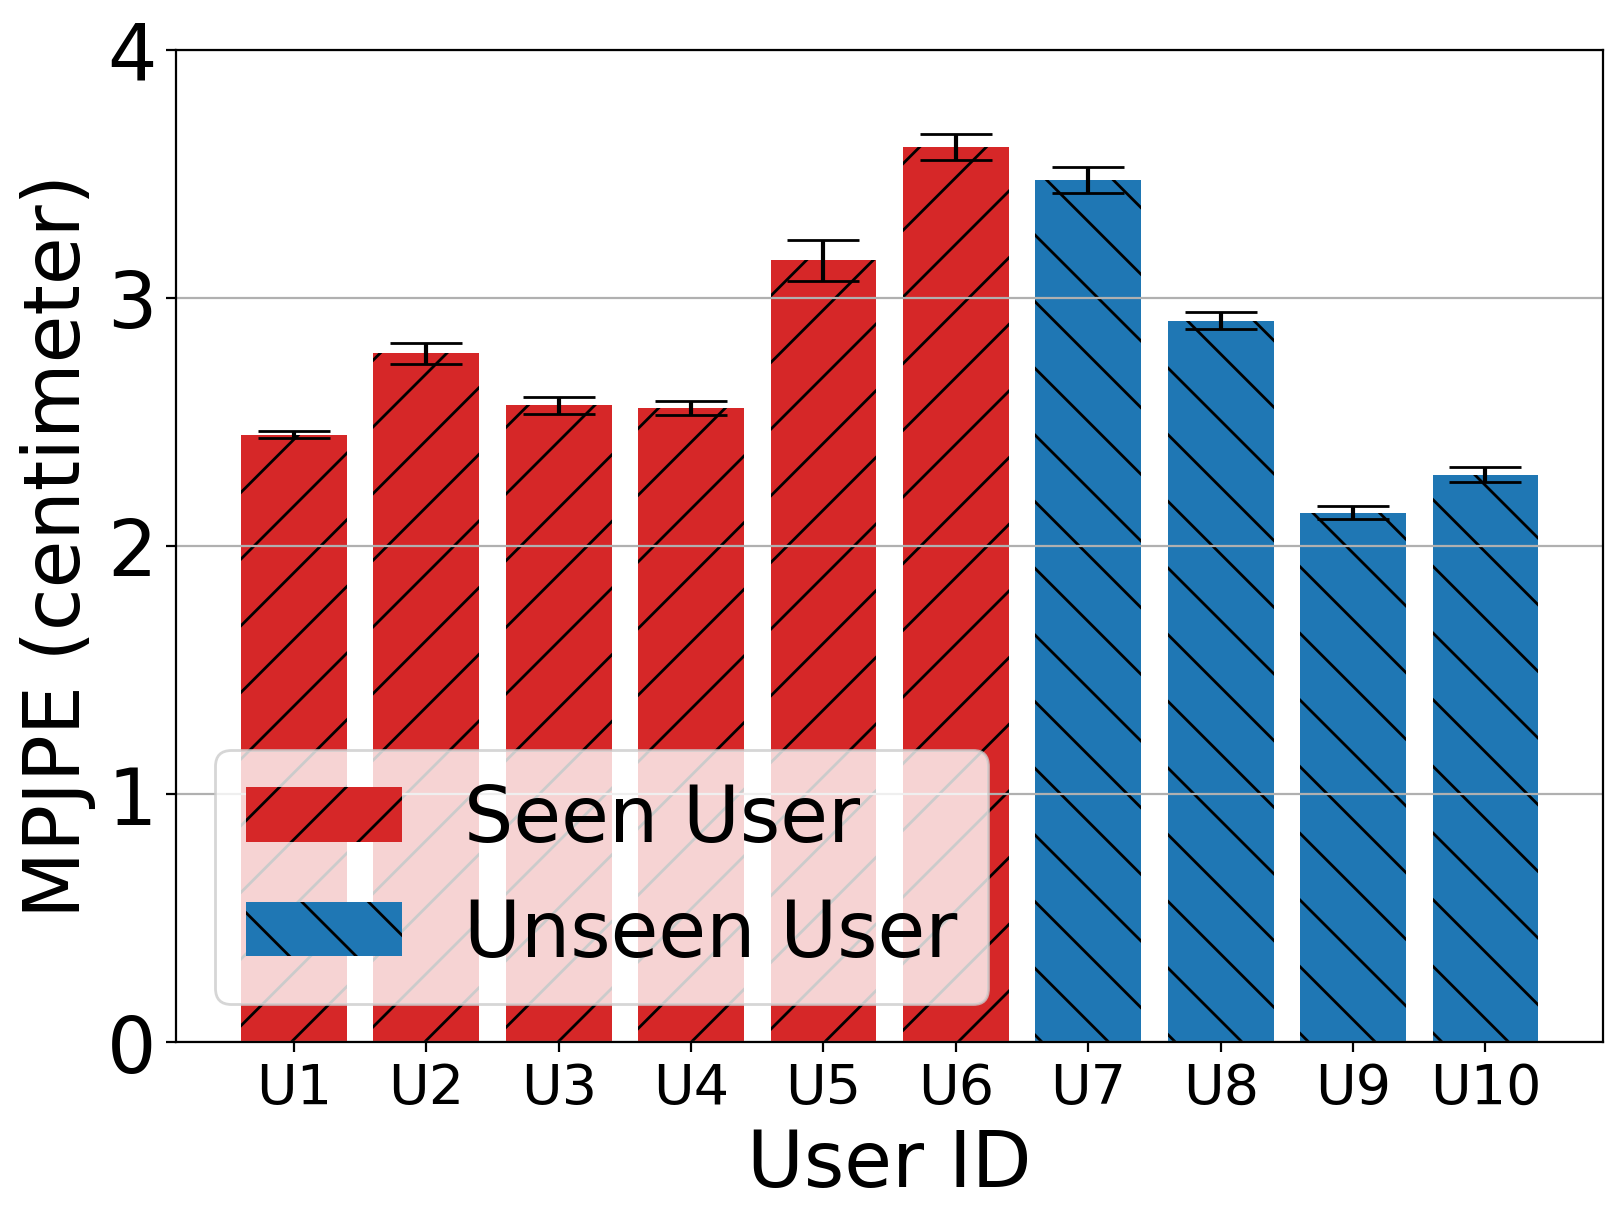

In [15]:
def match_u_id(file_name):
    '''
    params:
    file_name: str, the file name to check
    
    Return:
    u_id: int, the id of u
    '''
    return file_name.split('_')[1][1:]

def calcu_results(model_name, selected_file_lists, all_files):
    '''
    params:
    check_model_name: str, the model name to check
    all_files: list, all the tested files
    selected_files: list, the selected files to check, if not given, then all the files will be checked
    
    Return:
    mean_joints_error: float, the mean joints error
    mean_root_drift_error: float, the mean root drift error
    mpjpe: float, the mean per joint position error
    pcks: list, the percentage of correct keypoints for different errors
    pck_2cm: float, the percentage of correct keypoints for 2cm error
    pck_3cm: float, the percentage of correct keypoints for 3cm error
    per_dimention_mae: list, the mean absolute error for each dimension
    '''
    return_result = []
    for selected_file in selected_file_lists:
        mean_joints_error_wo_root_drift, mean_root_drift_error, mpjpe,\
        mpjpe_var ,pcks, errors, pck_2cm, pck_3cm, per_dimention_mae,\
            total_mae, tatal_mae_var = check_result(model_name, all_files, selected_file)
        
        ret_dict = {}
        ret_dict['mean_joints_error_wo_root_drift'] = mean_joints_error_wo_root_drift
        ret_dict['mean_root_drift_error'] = mean_root_drift_error
        ret_dict['mpjpe'] = mpjpe
        ret_dict['pcks'] = pcks
        ret_dict['errors'] = errors
        ret_dict['pck_2cm'] = pck_2cm
        ret_dict['pck_3cm'] = pck_3cm
        ret_dict['per_dimention_mae'] = per_dimention_mae
        ret_dict['std_mjpje'] = mpjpe_var
        ret_dict['mae_all_dimention'] = total_mae
        ret_dict['std_all_dimention'] = tatal_mae_var
        return_result.append(ret_dict)
    return return_result

file_lists_cross_user = [
    ['P1_U1_L_X_X_1.pkl', 'P1_U1_L_X_X_2.pkl', 'P1_U1_R_X_X_1.pkl', 'P2_U1_L_X_X_0.pkl', 'P2_U1_L_X_X_2.pkl', 'P2_U1_R_X_X_0.pkl', 'P3_U1_L_X_X_1.pkl', 'P3_U1_L_X_X_2.pkl', 'P3_U1_R_X_X_0.pkl', 'P3_U1_R_X_X_1.pkl'],
    ['P2_U2_L_X_X_2.pkl', 'P2_U2_R_X_X_1.pkl', 'P2_U2_R_X_X_2.pkl', 'P5_U2_L_X_X_0.pkl', 'P5_U2_L_X_X_1.pkl', 'P5_U2_L_X_X_2.pkl', 'P5_U2_R_X_X_0.pkl', 'P5_U2_R_X_X_1.pkl', 'P5_U2_R_X_X_2.pkl'],
    ['P1_U3_L_X_X_1.pkl', 'P1_U3_R_X_X_0.pkl'],
    ['P1_U4_L_X_X_0.pkl', 'P1_U4_R_X_X_0.pkl'],
    ['P1_U5_R_X_X_0.pkl', 'P1_U5_R_X_X_1.pkl'],
    ['P1_U7_L_X_X_1.pkl'],
    ['P1_U9_R_X_X_0.pkl'],
    ['P1_U10_R_X_X_1.pkl'],
    ['P1_U6_L_X_X_1.pkl', 'P1_U6_R_X_X_0.pkl'],
    ['P1_U8_L_X_X_0.pkl'],
]

labels = ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10']
result = calcu_results('77_20242421040_tapor', file_lists_cross_user, files)
print(len(result))
mpjpelist = []
for i in range(len(result)):
    mpjpelist.append(result[i]['mpjpe'])
# draw the mpjpe of different users
plt.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(figsize = (8,6),dpi=200, layout='constrained')
# plot the bar char of the mpjpe of different users and set the first 6 bars to be red with hatch
bar = plt.bar(labels, mpjpelist, color=['tab:red' if i < 6 else 'tab:blue' for i in range(len(mpjpelist))])
for i in range(10):
    if i <6:
        bar[i].set_hatch('/')
    else:
        bar[i].set_hatch('\\')

# bar = plt.bar(labels, mpjpelist)
# plot std of each bar
for i in range(len(result)):
    plt.errorbar(labels[i], mpjpelist[i], yerr=result[i]['std_mjpje'], color='black', capsize=13)
# bar[0].set_color('tab:red')
plt.xticks(labels, labels)
# rotate the x labels
# plt.xticks(rotation=45)
plt.ylabel('MPJPE (centimeter)')
plt.xlabel('User ID')
plt.legend(handles=[bar[0], bar[6]], labels=['Seen User', 'Unseen User'])
plt.ylim(0, 4)
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=20)
# plt.savefig("figures/new_compare_" +'user_mpjpe_bar'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'user_mpjpe_bar' +'.pdf')
plt.show()


# Fig. 15. Impact of different environments.

5


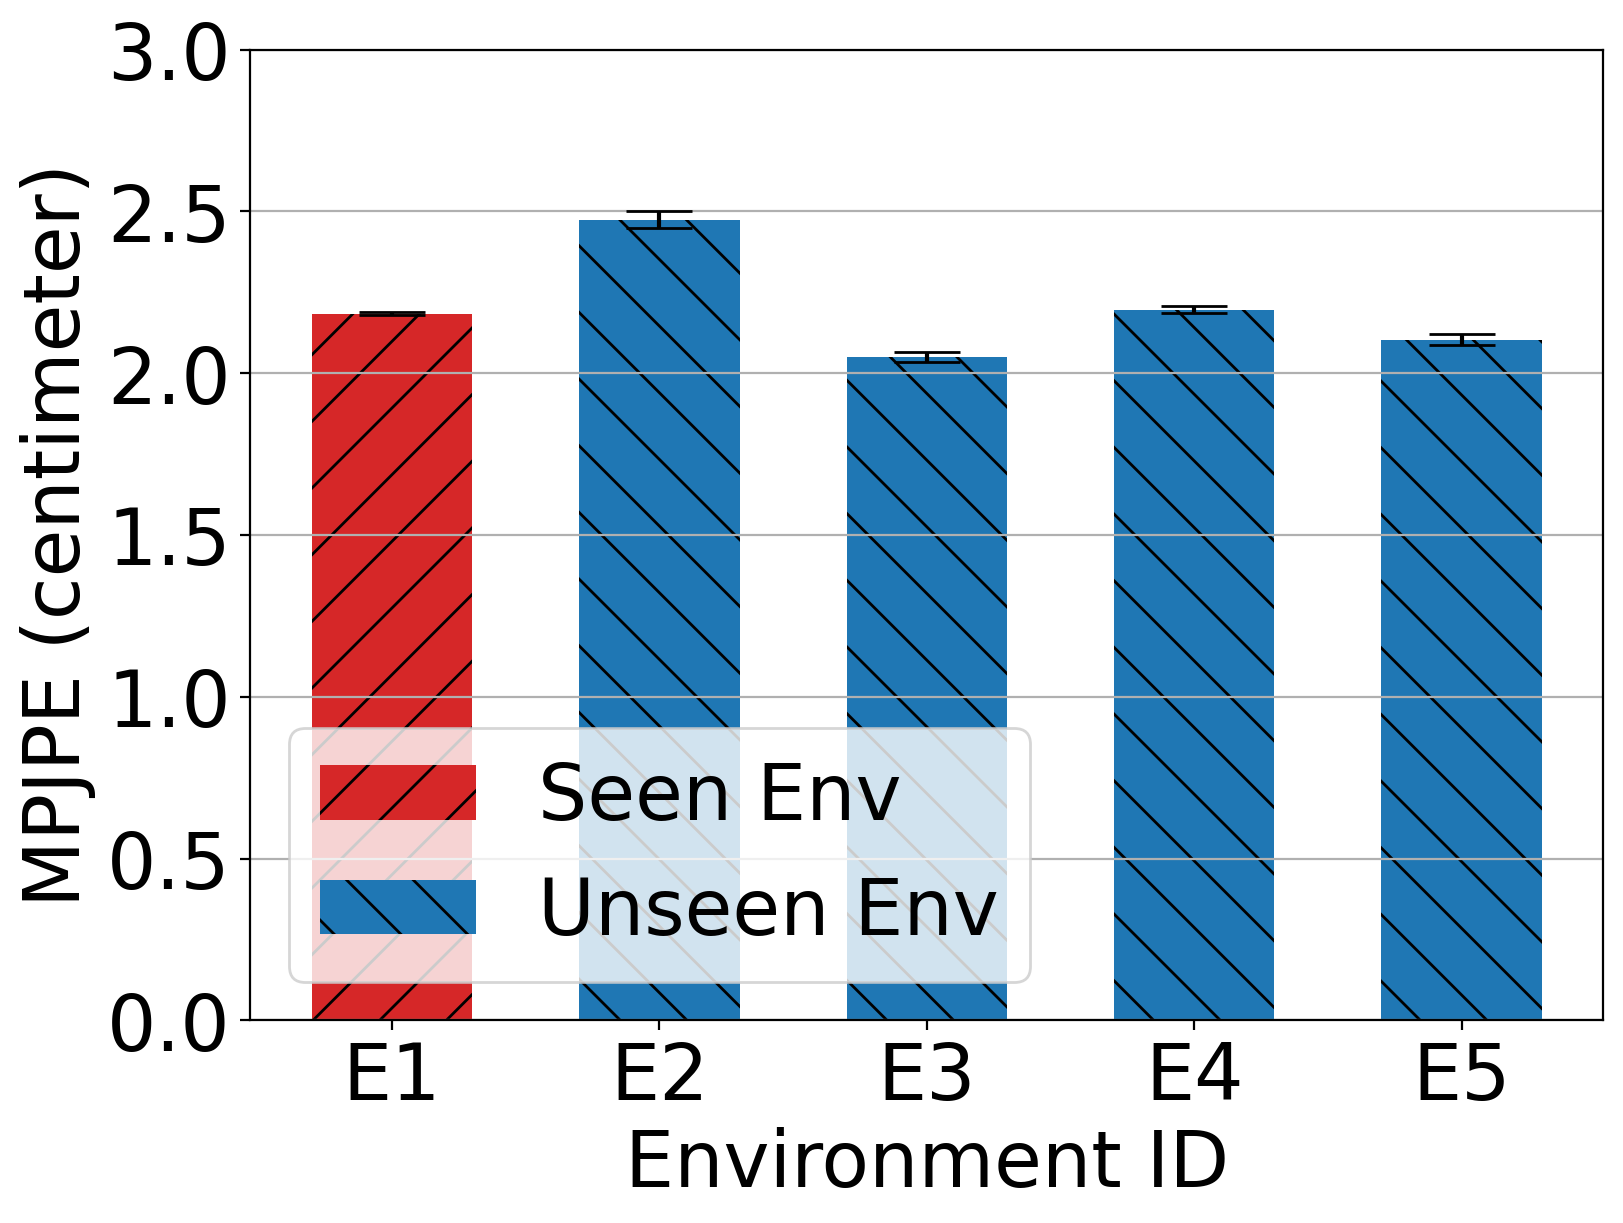

In [16]:
selected_file_lists_cross_place = [
['P1_U10_L_X_X_0.pkl', 'P1_U10_L_X_X_1.pkl', 'P1_U10_R_X_X_1.pkl', 'P1_U1_L_X_X_1.pkl', 'P1_U1_L_X_X_2.pkl', 'P1_U1_R_Cover_coolwater_0.pkl', 'P1_U1_R_Cover_coolwater_1.pkl', 'P1_U1_R_Cover_flour_0.pkl', 'P1_U1_R_Cover_flour_1.pkl', 'P1_U1_R_Cover_foam_0.pkl', 'P1_U1_R_Cover_foam_1.pkl', 'P1_U1_R_Cover_no_0.pkl', 'P1_U1_R_Cover_no_1.pkl', 'P1_U1_R_Cover_oil_0.pkl', 'P1_U1_R_Cover_oil_1.pkl', 'P1_U1_R_Cover_warmwater_0.pkl', 'P1_U1_R_Cover_warmwater_1.pkl', 'P1_U1_R_Dist_Dist_0.pkl', 'P1_U1_R_Dist_Dist_1.pkl', 'P1_U1_R_LightCond0_X_0.pkl', 'P1_U1_R_LightCond0_X_1.pkl', 'P1_U1_R_LightCond1_X_0.pkl', 'P1_U1_R_LightCond1_X_1.pkl', 'P1_U1_R_LightCond2_X_0.pkl', 'P1_U1_R_LightCond2_X_1.pkl', 'P1_U1_R_LightCond3_X_0.pkl', 'P1_U1_R_LightCond3_X_1.pkl', 'P1_U1_R_X_X_1.pkl', 'P1_U2_R_Cover_coolwater_0.pkl', 'P1_U2_R_Cover_coolwater_1.pkl', 'P1_U2_R_Cover_flour_0.pkl', 'P1_U2_R_Cover_flour_1.pkl', 'P1_U2_R_Cover_foam_0.pkl', 'P1_U2_R_Cover_foam_1.pkl', 'P1_U2_R_Cover_no_0.pkl', 'P1_U2_R_Cover_no_1.pkl', 'P1_U2_R_Cover_oil_0.pkl', 'P1_U2_R_Cover_oil_1.pkl', 'P1_U2_R_Cover_warmwater_0.pkl', 'P1_U2_R_Cover_warmwater_1.pkl', 'P1_U2_R_Dist_Dist_0.pkl', 'P1_U2_R_Dist_Dist_1.pkl', 'P1_U2_R_Dist_Dist_2.pkl', 'P1_U2_R_LightCond0_X_0.pkl', 'P1_U2_R_LightCond0_X_1.pkl', 'P1_U2_R_LightCond1_X_0.pkl', 'P1_U2_R_LightCond1_X_1.pkl', 'P1_U2_R_LightCond2_X_0.pkl', 'P1_U2_R_LightCond2_X_1.pkl', 'P1_U2_R_LightCond3_X_0.pkl', 'P1_U2_R_LightCond3_X_1.pkl', 'P1_U2_R_X_X_0.pkl', 'P1_U2_R_X_X_1.pkl', 'P1_U2_R_X_X_2.pkl', 'P1_U3_L_X_X_1.pkl', 'P1_U3_R_X_X_0.pkl', 'P1_U4_L_X_X_0.pkl', 'P1_U4_R_X_X_0.pkl', 'P1_U5_R_X_X_0.pkl', 'P1_U5_R_X_X_1.pkl', 'P1_U6_L_X_X_0.pkl', 'P1_U6_L_X_X_1.pkl', 'P1_U6_R_X_X_0.pkl', 'P1_U6_R_X_X_1.pkl', 'P1_U7_L_X_X_1.pkl', 'P1_U8_L_X_X_0.pkl', 'P1_U8_R_X_X_0.pkl', 'P1_U8_R_X_X_1.pkl', 'P1_U9_R_X_X_0.pkl'],
['P2_U2_L_X_X_0.pkl', 'P2_U2_R_X_X_2.pkl'],
['P3_U1_L_X_X_1.pkl', 'P3_U1_L_X_X_2.pkl', 'P3_U1_R_X_X_0.pkl', 'P3_U1_R_X_X_1.pkl', 'P3_U1_R_X_X_2.pkl'],
['P5_U1_L_X_X_0.pkl', 'P5_U1_L_X_X_1.pkl', 'P5_U1_L_X_X_2.pkl', 'P5_U1_R_X_X_0.pkl', 'P5_U1_R_X_X_1.pkl', 'P5_U2_L_X_X_0.pkl', 'P5_U2_L_X_X_1.pkl', 'P5_U2_L_X_X_2.pkl', 'P5_U2_R_X_X_0.pkl', 'P5_U2_R_X_X_1.pkl', 'P5_U2_R_X_X_2.pkl'],
['P6_U1_R_X_X_2.pkl', 'P6_U1_L_X_X_1.pkl', 'P6_U1_L_X_X_0.pkl', 'P6_U1_R_X_X_1.pkl'],
]



labels = ['E1', 'E2', 'E3', 'E4', 'E5',]
result = calcu_results('77_20242421040_tapor', selected_file_lists_cross_place, files)
print(len(result))
mpjpelist = []
for i in range(len(result)):
    mpjpelist.append(result[i]['mpjpe'])
# draw the mpjpe of different users
plt.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(figsize = (8,6),dpi=200, layout='constrained')
bar = plt.bar(labels, mpjpelist, color=['tab:red' if i < 1 else 'tab:blue' for i in range(len(mpjpelist))] , width = 0.6)
for i in range(5):
    if i <1:
        bar[i].set_hatch('/')
    else:
        bar[i].set_hatch('\\')
# plot std of each bar
for i in range(len(result)):
    plt.errorbar(labels[i], mpjpelist[i], yerr=result[i]['std_mjpje'], color='black', capsize=12)
# bar[0].set_color('tab:red')
plt.xticks(labels, labels)
# rotate the x labels
# plt.xticks(rotation=45)
plt.legend(handles=[bar[0], bar[1]], labels=['Seen Env', 'Unseen Env'], loc='lower left')
plt.ylabel('MPJPE (centimeter)')
plt.xlabel('Environment ID')
plt.ylim(0, 3)
plt.grid(axis='y')
# plt.savefig("figures/new_compare_" +'env_mpjpe_bar'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'env_mpjpe_bar' +'.pdf')
plt.show()



# Fig. 16. Impact of hand distances

[20. 22. 24. 26. 28. 30. 32. 34. 36. 38. 40. 42. 44. 46. 48. 50.]


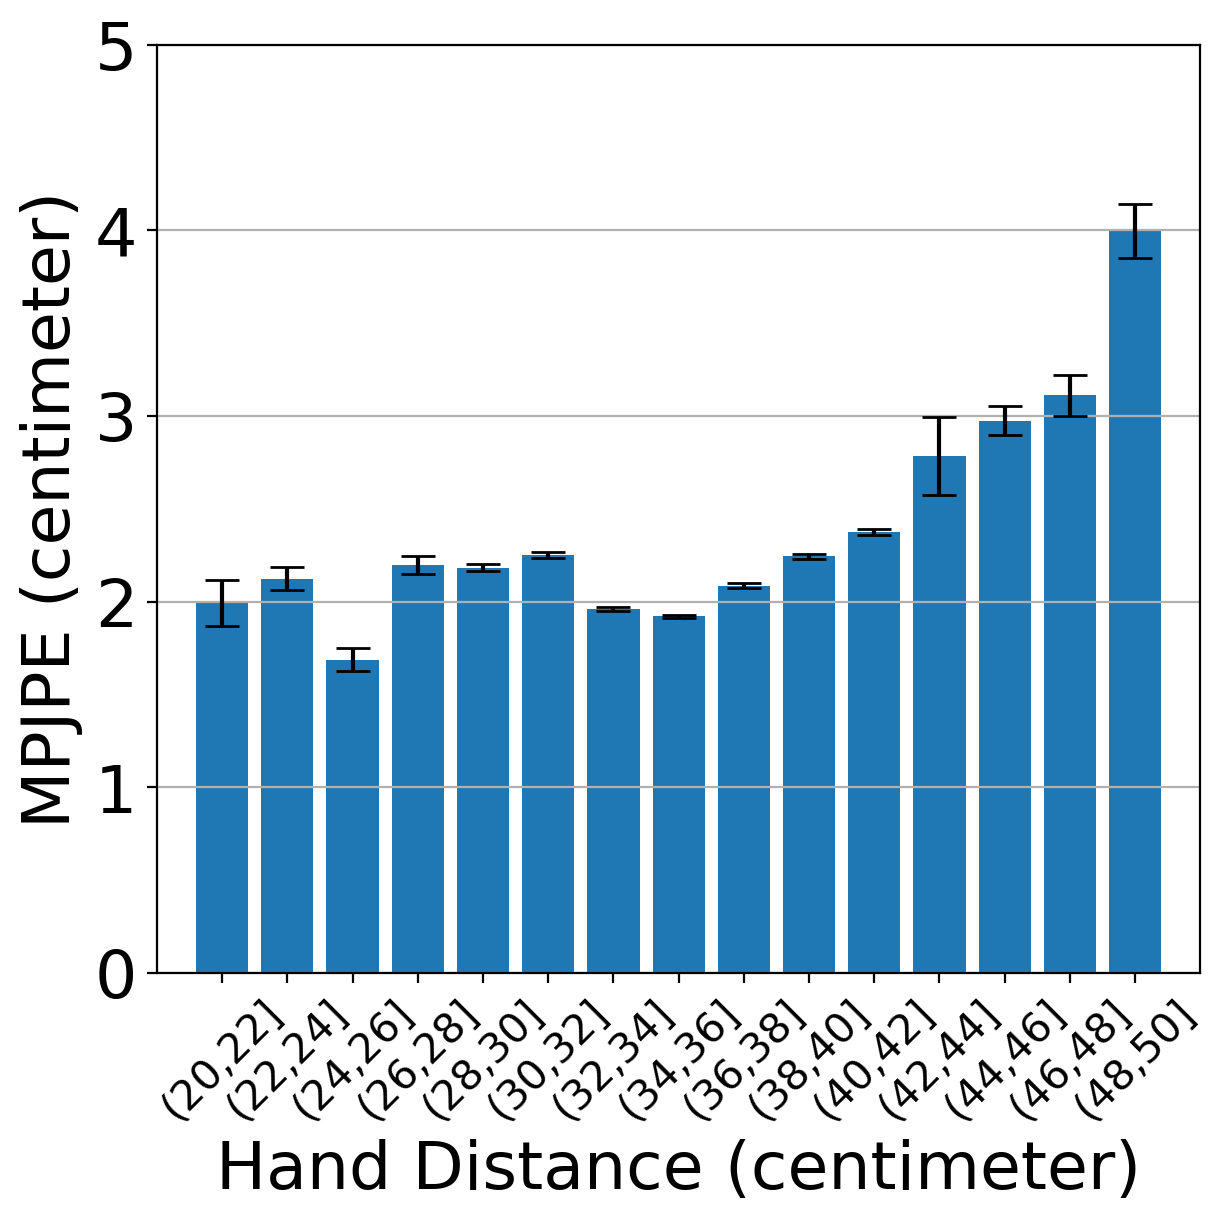

In [18]:
check_model_name = '77_20242421040_tapor'
data_path = 'LogInference'
selected_files = file_names


file_name = None
for f in files: 
    if check_model_name in f:
        file_name = f
        break
if file_name is None:
    print(check_model_name)
    print('The model name is not found')
 
result_data = pickle.load(open(os.path.join(data_path, file_name), 'rb'))
infernece_file_name = result_data['infernece_file_name']
failed_file_names = result_data['failed_file_names']
predicts = result_data['predicts']
labels = result_data['labels']

selected_predicts = []
selected_labels = []
if len(selected_files) > 0:
    for i in range(len(infernece_file_name)):
        if infernece_file_name[i] in selected_files:
            selected_predicts.append(predicts[i])
            selected_labels.append(labels[i])
        else:
            pass
else:
    selected_predicts = predicts
    selected_labels = labels

predicts = np.concatenate(selected_predicts, axis=0) * 100 # convert to cm unit
labels = np.concatenate(selected_labels, axis=0)* 100 # convert to cm unit

hand_distance0 = labels[:,0]
hand_distance9 = labels[:,9]

distance_step = np.linspace(20, 50, 16)
print(distance_step)
distance_mpjpe = []
distance_mpjpe_ci = []

for i in range(len(distance_step)-1):
    low = distance_step[i]
    up = distance_step[i+1]
    index1 = np.where((hand_distance0 > low) & (hand_distance0 <= up))
    index9 = np.where((hand_distance9 > low) & (hand_distance9 <= up))
    index = np.intersect1d(index1, index9)
    temp_predicts = predicts[index]
    temp_labels = labels[index]
    mpjpe, mpjpe_ci = calculate_mpjpe_add_ci(temp_predicts, temp_labels)
    distance_mpjpe.append(mpjpe)
    distance_mpjpe_ci.append(mpjpe_ci)

x_ticks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
# plt.bar(compare_loss_models, mpjpe_list)
bar = plt.bar(x_ticks, distance_mpjpe)
# plot std of each bar
for i in range(len(distance_mpjpe_ci)):
    plt.errorbar(x_ticks[i], distance_mpjpe[i],
                 yerr=distance_mpjpe_ci[i], color='black',
                 capsize=6)
# bar[0].set_color('tab:red')

labels_s = [
    '(20,22]',
    '(22,24]',
    '(24,26]',
    '(26,28]',
    '(28,30]',
    '(30,32]',
    '(32,34]',
    '(34,36]',
    '(36,38]',
    '(38,40]',
    '(40,42]',
    '(42,44]',
    '(44,46]',
    '(46,48]',
    '(48,50]',
]
plt.xticks(x_ticks, labels_s)
# rotate the x labels
plt.xticks(rotation=45)
plt.ylabel('MPJPE (centimeter)')
plt.xlabel('Hand Distance (centimeter)')
plt.ylim(0, 5)
plt.xlim(-1, 15)
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=15)

# plt.savefig("figures/new_compare_" +'distance_mae_bar'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'distance_mae_bar' +'.pdf')
plt.show()



# Fig. 20. Performance across different light conditions

In [28]:
# match the id of u in the file name
def match_light(file_name):
    '''
    params:
    file_name: str, the file name to check
    
    Return:
    u_id: int, the id of u
    '''

    return file_name.split('_')[3]

selected_file_lists_cross_LC = [[] for i in range(4)]

for file_name in file_names:
    id = match_light(file_name)
    if 'LightCond' in id:
        i = int(id[-1])
        selected_file_lists_cross_LC[i].append(file_name)
print(selected_file_lists_cross_LC)

labels = ['L0', 'L1', 'L2', 'L3']
result = calcu_results('77_20242421040_tapor', selected_file_lists_cross_LC, files)
# print(len(result))
mpjpelist = []
for i in range(len(result)):
    mpjpelist.append(result[i]['mpjpe'])
# draw the mpjpe of different users
for i in range(len(result)):
    print(mpjpelist[i], result[i]['std_mjpje'])



temp_files_names = [
    [
    'Px_U2_R_LightCond6_X_2.pkl',   
    'Px_U2_R_LightCond6_X_4.pkl', 
    ],

 [
    'Px_U1_R_LightConds7_X_1.pkl',
    'Px_U1_R_LightConds7_X_7.pkl',
    ]]

temp_results_mpjpe = []
temp_results_mpjpe_ci = []
dimention_maes = []

for k, selected_files in enumerate(temp_files_names):
    result_path = 'outside_logs/tapor_type1_weights_77_20242421040_tapor.pth_2024316155544_result_dict.pkl'
    result_data = pickle.load(open(result_path, 'rb'))

    infernece_file_name = result_data['infernece_file_name']
    failed_file_names = result_data['failed_file_names']
    predicts = result_data['predicts']
    labels = result_data['labels']

    selected_predicts = []
    selected_labels = []
    if len(selected_files) > 0:
        for i in range(len(infernece_file_name)):
            if infernece_file_name[i] in selected_files:
                selected_predicts.append(predicts[i])
                selected_labels.append(labels[i])
            else:
                pass
    else:
        selected_predicts = predicts
        selected_labels = labels
    predicts = np.concatenate(selected_predicts, axis=0) * 100 # convert to cm unit
    labels = np.concatenate(selected_labels, axis=0)* 100 # convert to cm unit
    
    mean_joints_error_wo_root_drift, mean_root_drift_error = calculate_shift_error(predicts, labels)
    mpjpe, mpjpe_ci = calculate_mpjpe_add_ci(predicts, labels)
    per_dimention_mae = np.mean(np.abs(predicts - labels),axis=0)
    per_dimention_mae = np.mean(per_dimention_mae, axis=0)
    temp_results_mpjpe.append(mpjpe)
    temp_results_mpjpe_ci.append(mpjpe_ci)
    dimention_maes.append(per_dimention_mae)

print(temp_results_mpjpe)
print(temp_results_mpjpe_ci)

[['P1_U1_R_LightCond0_X_0.pkl', 'P1_U1_R_LightCond0_X_1.pkl', 'P1_U2_R_LightCond0_X_0.pkl', 'P1_U2_R_LightCond0_X_1.pkl'], ['P1_U1_R_LightCond1_X_0.pkl', 'P1_U1_R_LightCond1_X_1.pkl', 'P1_U2_R_LightCond1_X_0.pkl', 'P1_U2_R_LightCond1_X_1.pkl'], ['P1_U1_R_LightCond2_X_0.pkl', 'P1_U1_R_LightCond2_X_1.pkl', 'P1_U2_R_LightCond2_X_0.pkl', 'P1_U2_R_LightCond2_X_1.pkl'], ['P1_U1_R_LightCond3_X_0.pkl', 'P1_U1_R_LightCond3_X_1.pkl', 'P1_U2_R_LightCond3_X_0.pkl', 'P1_U2_R_LightCond3_X_1.pkl']]
2.007024 0.011743584244066012
1.6146619 0.01126489364042466
2.1764522 0.012825209573743333
1.6608723 0.011145094120375844
[3.1134338, 2.421758]
[0.07246829814757165, 0.038378969662952025]


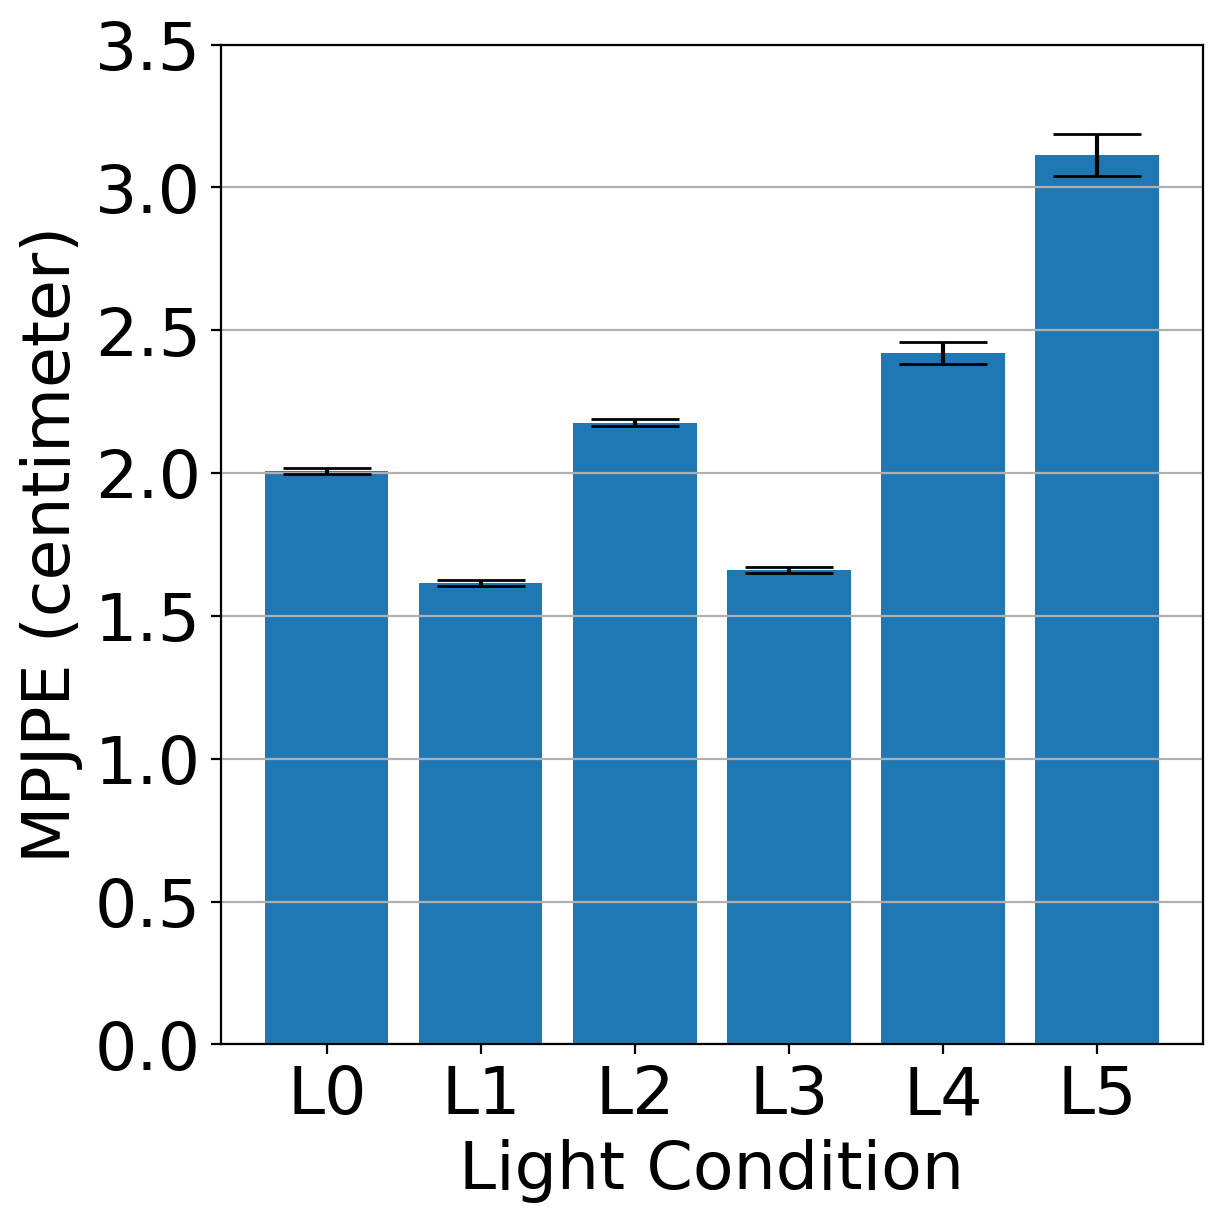

In [30]:
labels = ['L0', 'L1', 'L2', 'L3', 'L4', 'L5']

# the following results are from the above cells
mpjpelist = [2.007024, 1.6146619, 2.1764522, 1.6608723, 2.421758, 3.1134338]
mpjpelist_std = [
 0.011743584244066012,
 0.01126489364042466,
 0.012825209573743333,
 0.011145094120375844,
 0.038378969662952025,
 0.07246829814757165,
]
# draw the mpjpe of different users
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
# plt.bar(compare_loss_models, mpjpe_list)
bar = plt.bar(labels, mpjpelist)
# plot std of each bar
for i in range(len(mpjpelist)):
    plt.errorbar(labels[i], mpjpelist[i], yerr=mpjpelist_std[i], color='black', capsize=16)

    # print(mpjpelist[i], mpjpelist_std)
# bar[0].set_color('tab:red')
plt.xticks(labels, labels)
# rotate the x labels
# plt.xticks(rotation=45)
plt.ylabel('MPJPE (centimeter)')
plt.xlabel('Light Condition')
plt.ylim(0, 3.5)
plt.grid(axis='y')
# plt.savefig("figures/new_compare_" +'light_mpjpe_bar1'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'light_mpjpe_bar1' +'.pdf')
plt.show()

# Fig. 21. Impact of the hand covering

[['P1_U1_R_Cover_no_0.pkl', 'P1_U1_R_Cover_no_1.pkl', 'P1_U2_R_Cover_no_0.pkl', 'P1_U2_R_Cover_no_1.pkl'], ['P1_U1_R_Cover_flour_0.pkl', 'P1_U1_R_Cover_flour_1.pkl', 'P1_U2_R_Cover_flour_0.pkl', 'P1_U2_R_Cover_flour_1.pkl'], ['P1_U1_R_Cover_foam_0.pkl', 'P1_U1_R_Cover_foam_1.pkl', 'P1_U2_R_Cover_foam_0.pkl', 'P1_U2_R_Cover_foam_1.pkl'], ['P1_U1_R_Cover_coolwater_0.pkl', 'P1_U1_R_Cover_coolwater_1.pkl', 'P1_U2_R_Cover_coolwater_0.pkl', 'P1_U2_R_Cover_coolwater_1.pkl'], ['P1_U1_R_Cover_warmwater_0.pkl', 'P1_U1_R_Cover_warmwater_1.pkl', 'P1_U2_R_Cover_warmwater_0.pkl', 'P1_U2_R_Cover_warmwater_1.pkl'], ['P1_U1_R_Cover_oil_0.pkl', 'P1_U1_R_Cover_oil_1.pkl', 'P1_U2_R_Cover_oil_0.pkl', 'P1_U2_R_Cover_oil_1.pkl'], ['P1_U1_R_Cover_ring_0.pkl', 'P1_U1_R_Cover_ring_1.pkl'], ['P1_UX_cover_nail_0.pkl', 'P1_UX_cover_nail_2.pkl', 'P1_UX_cover_nail_3.pkl', 'P1_UX_cover_nail_4.pkl', 'P1_UX_cover_nail_6.pkl', 'P1_UX_cover_nail_7.pkl'], ['P1_U2_R_Cover_glove_1.pkl'], ['P1_U1_cover_medicalGlove_0.pkl', '

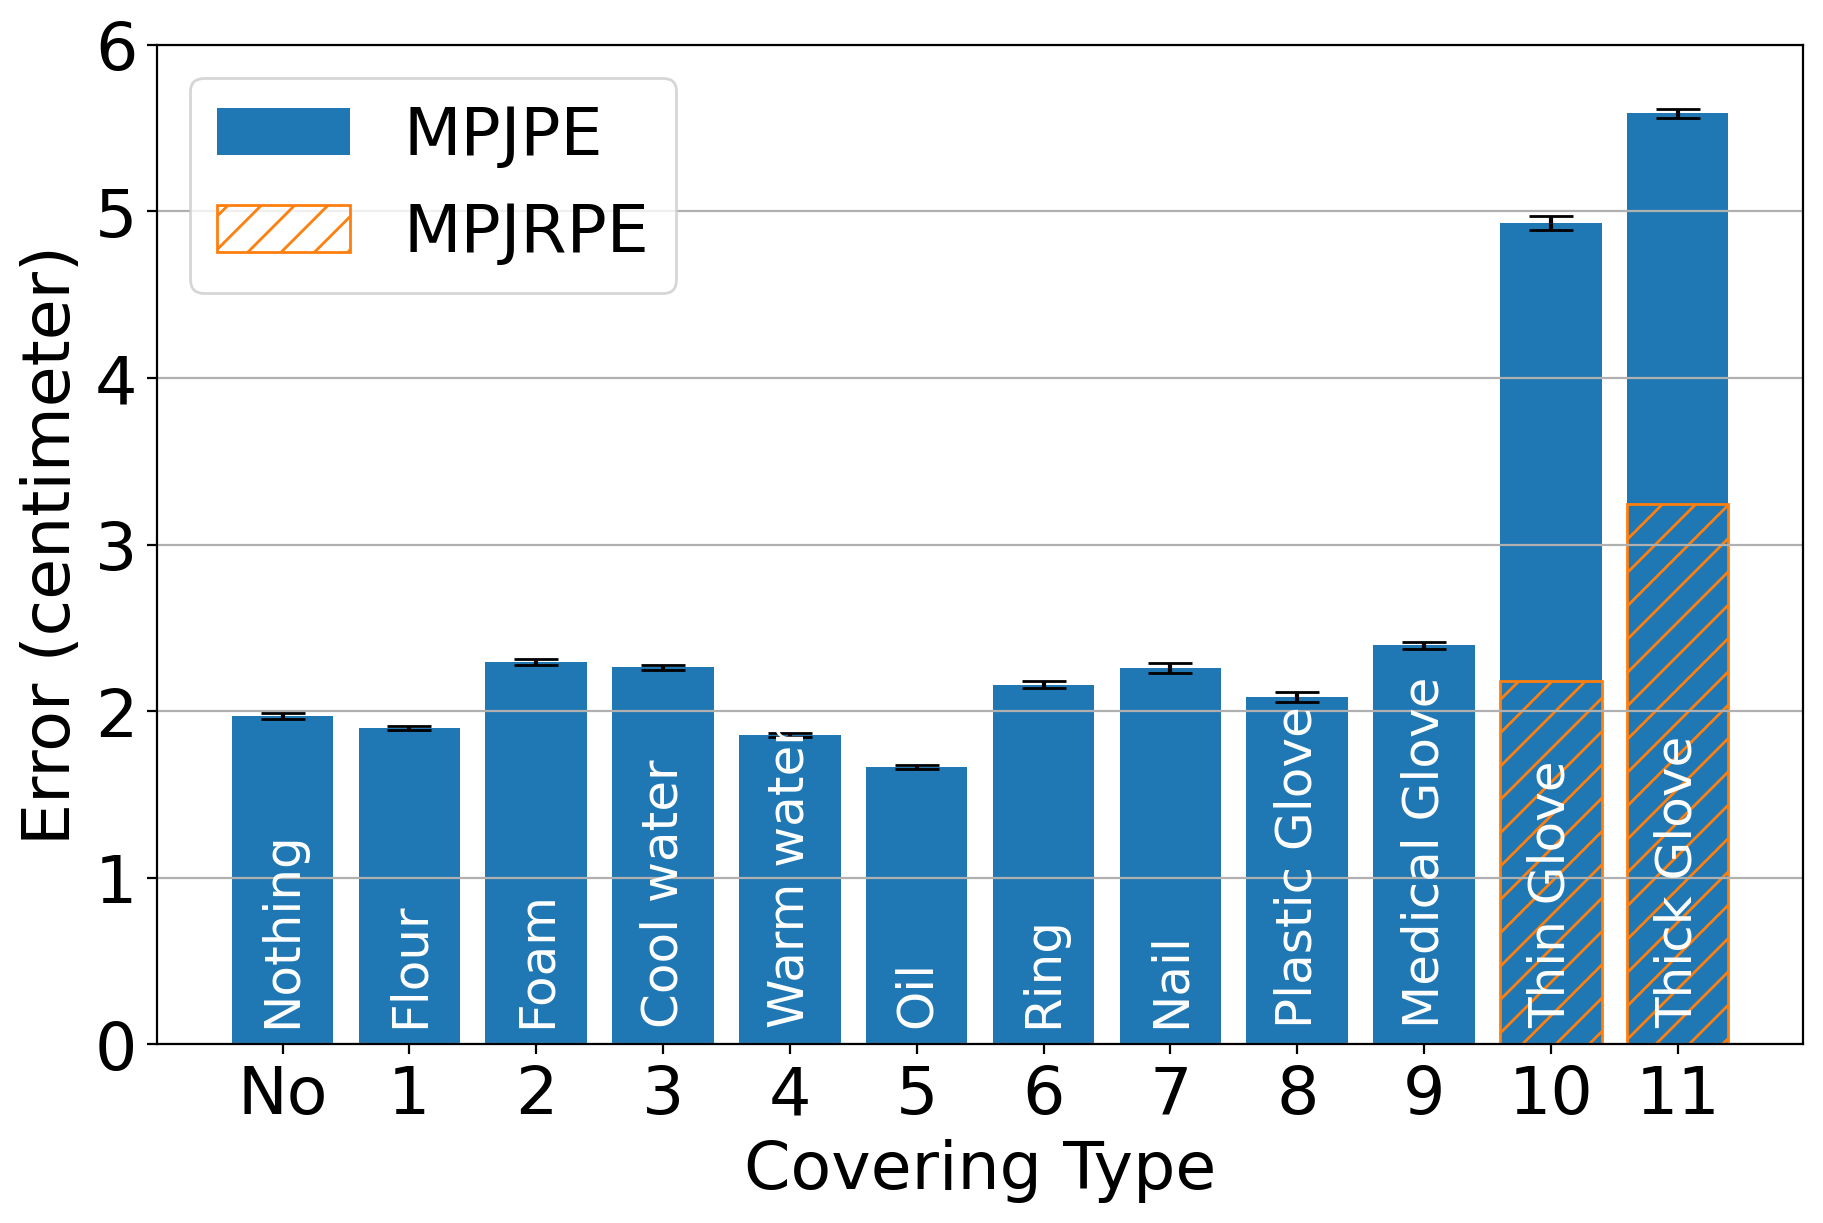

In [20]:
# match the id of u in the file name
def match_cover(vocab, file_name):
    '''
    params:
    file_name: str, the file name to check
    
    Return:
    u_id: int, the id of u
    '''
    for key in vocab.keys():
        if key in file_name:
            return vocab[key]
    return None


selected_file_lists_cover = [[] for i in range(12)]
vocab = {'coolwater':4, 'flour':2, 'foam':3, 'no':1, 'oil':6, 'warmwater':5, 'glove':9, 'ring':7,'thick0': 11, 'thick1': 12, 'nail': 8, 'medicalGlove': 10,}

for file_name in file_names:
    id = match_cover(vocab, file_name)
    if id is not None:
        selected_file_lists_cover[id-1].append(file_name)
print(selected_file_lists_cover)

labels = ['No', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


result = calcu_results('77_20242421040_tapor.pth_2024311193111', selected_file_lists_cover, files)
print(len(result))
mpjpelist = []
pose_error = []
root_drift = []
for i in range(len(result)):
    mpjpelist.append(result[i]['mpjpe'])
    pose_error.append(np.mean(result[i]['mean_joints_error_wo_root_drift']))
    root_drift.append(np.mean(result[i]['mean_root_drift_error']))
print(pose_error)
print(root_drift)   
# draw the mpjpe of different users
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (9,6),dpi=200, layout='constrained')
# plt.bar(compare_loss_models, mpjpe_list)
bar = plt.bar(labels, mpjpelist, label = 'MPJPE')
# plot std of each bar
for i in range(len(result)):
    plt.errorbar(labels[i], mpjpelist[i], yerr=result[i]['std_mjpje'], color='black', capsize=8)

for i in range(10):
    pose_error[i] = 0
plt.bar(labels, pose_error, facecolor = 'none', label = 'MPJRPE', alpha = 1, hatch = '//', edgecolor = 'tab:orange')
# bar[0].set_color('tab:red')
plt.xticks(labels, labels)
# rotate the x labels
# plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Error (centimeter)')
plt.xlabel('Covering Type')
plt.ylim(0, 6)

# add text on the bar
labels = ['Nothing', 'Flour', 'Foam', 'Cool water', 'Warm water','Oil', 'Ring','Nail',  'Plastic Glove', 'Medical Glove', 'Thin Glove', 'Thick Glove',]
for i in range(len(result)):
    plt.text(i, 0.1, labels[i], 
             ha='center', 
             va='bottom', 
             fontsize=18,
             rotation = 'vertical',
             color = 'white',
             )
        
plt.grid(axis='y')
# plt.savefig("figures/new_compare_" +'cover_mpjpe_bar2'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'cover_mpjpe_bar2' +'.pdf')
plt.show()


# Fig. 17. Impact of hand temperature.

[2.045779, 2.1409385, 2.159271, 2.4055033, 2.7972884]
[0.04650390222745502, 0.036011617520364636, 0.026699450461072607, 0.033751883580022485, 0.06051319322144463]


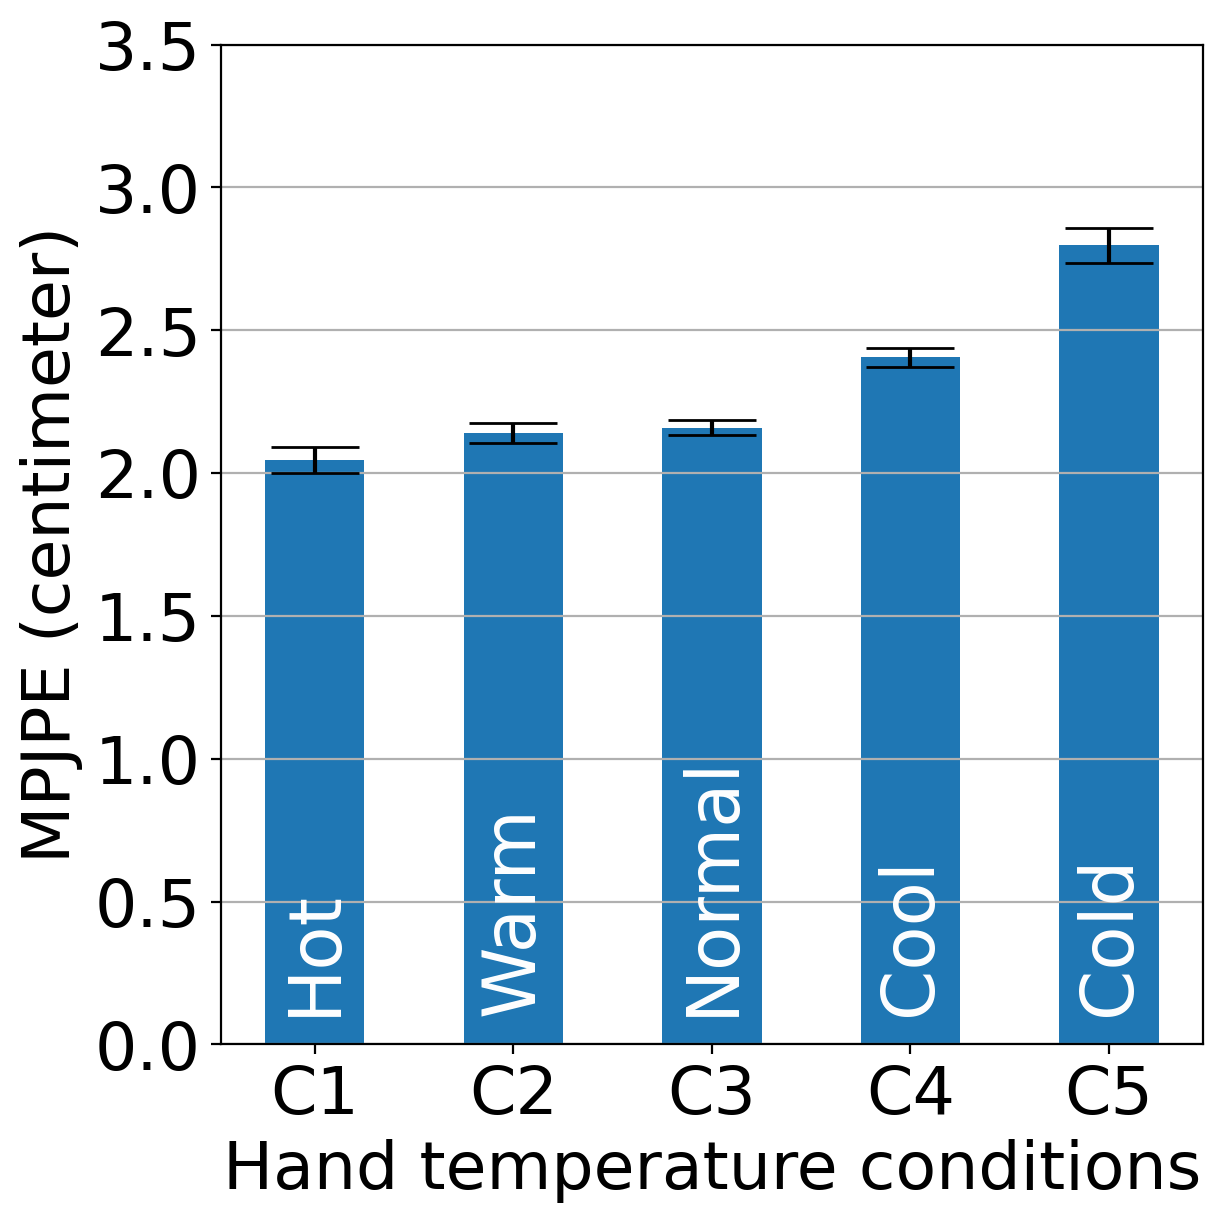

In [22]:
temp_files_names = [
    ['Px_U1_R_hot_X_2.pkl'],
    ['Px_U1_R_Warm_X_1.pkl', 'Px_U1_R_Warm_X_6.pkl', 'Px_U1_R_Warm_X_7.pkl'],
    ['Px_U1_R_normal_X_3.pkl', 'Px_U1_R_normal_X_4.pkl', 'Px_U1_R_normal_X_5.pkl', 'Px_U1_R_normal_X_6.pkl'],
    ['Px_U1_R_scold_X_1.pkl', 'Px_U1_R_scold_X_4.pkl'],
    ['Px_U1_R_vcold_X_4.pkl']
]

temp_results_mpjpe = []
temp_results_mpjpe_ci = []
dimention_maes = []
# z_drift = [0, 0 , 0, 0, 20, 5, 5, 5, 5, 5]
for k, selected_files in enumerate(temp_files_names):
    result_path = 'hand_T_logs/tapor_type1_weights_77_20242421040_tapor.pth_2024316161834_result_dict.pkl'
    result_data = pickle.load(open(result_path, 'rb'))

    infernece_file_name = result_data['infernece_file_name']
    failed_file_names = result_data['failed_file_names']
    predicts = result_data['predicts']
    labels = result_data['labels']

    selected_predicts = []
    selected_labels = []
    if len(selected_files) > 0:
        for i in range(len(infernece_file_name)):
            if infernece_file_name[i] in selected_files:
                selected_predicts.append(predicts[i])
                selected_labels.append(labels[i])
            else:
                pass
    else:
        selected_predicts = predicts
        selected_labels = labels
    predicts = np.concatenate(selected_predicts, axis=0) * 100 # convert to cm unit
    labels = np.concatenate(selected_labels, axis=0)* 100 # convert to cm unit
    
    mean_joints_error_wo_root_drift, mean_root_drift_error = calculate_shift_error(predicts, labels)
    mpjpe, mpjpe_ci = calculate_mpjpe_add_ci(predicts, labels)
    per_dimention_mae = np.mean(np.abs(predicts - labels),axis=0)
    per_dimention_mae = np.mean(per_dimention_mae, axis=0)
    temp_results_mpjpe.append(mpjpe)
    temp_results_mpjpe_ci.append(mpjpe_ci)
    dimention_maes.append(per_dimention_mae)

print(temp_results_mpjpe)
print(temp_results_mpjpe_ci)


labels = ['hot', 'Warm', 'normal', 'scold', 'vcold' ]
labels = ['C1', 'C2', 'C3', 'C4', 'C5' ]

mpjpelist = temp_results_mpjpe
mpjpelist_std = temp_results_mpjpe_ci
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
bar = plt.bar(labels, mpjpelist, width=0.5, color='tab:blue')
for i in range(len(mpjpelist)):
    plt.errorbar(labels[i], mpjpelist[i], yerr=mpjpelist_std[i], color='black', capsize=16)
    
plt.xticks(labels, labels)
labels = ['Hot', 'Warm', 'Normal', 'Cool', 'Cold' ]
for i in range(len(mpjpelist)):
    plt.text(i, 0.1, labels[i], 
             ha='center', 
             va='bottom', 
             fontsize=26,
             rotation = 'vertical',
             color = 'white',
             )
    
plt.ylabel('MPJPE (centimeter)')
plt.xlabel('Hand temperature conditions')
plt.ylim(0, 3.5)
plt.grid(axis='y')
# plt.savefig("figures/new_compare_" +'hand_temp_mpjpe_bar'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'hand_temp_mpjpe_bar' +'.pdf')
plt.show()

# Fig. 18. Performance w.r.t. ambient temperature

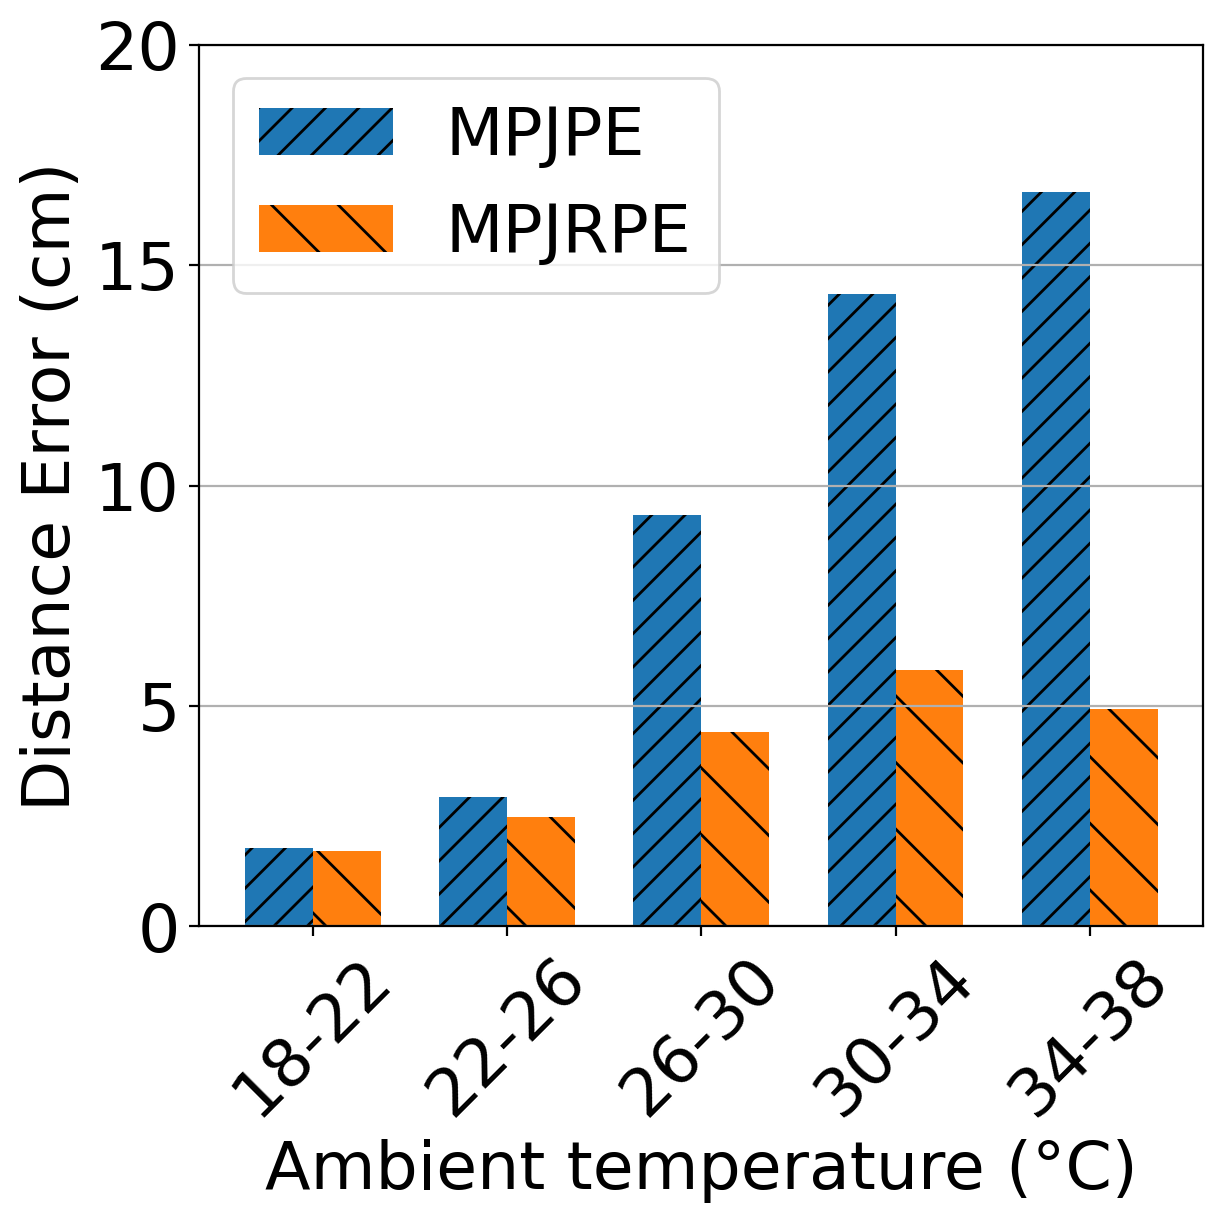

In [24]:
temperature_files_names = [
    ['P2_U1_R_X_X_Temp_17_0.pkl', 'P2_U1_R_X_X_Temp_17_1.pkl', 'P2_U1_R_X_X_Temp_17_2.pkl', 'P2_U1_R_X_X_Temp_17_3.pkl', 
     'P2_U1_R_X_X_Temp_17_4.pkl', 'P2_U2_R_X_X_Temp_17_0.pkl', 'P2_U2_R_X_X_Temp_17_3.pkl', 'P2_U2_R_X_X_Temp_24_1.pkl', 
     'P2_U2_R_X_X_Temp_24_2.pkl', 'P2_U2_R_X_X_Temp_17_1.pkl', 'P2_U2_R_X_X_Temp_17_2.pkl', 'P2_U2_R_X_X_Temp_17_4.pkl'], 
    ['P2_U1_R_X_X_Temp_20_2.pkl', 'P2_U1_R_X_X_Temp_20_3.pkl', 'P2_U2_R_X_X_Temp_20_0.pkl', 
     'P2_U2_R_X_X_Temp_20_1.pkl', 'P2_U2_R_X_X_Temp_20_2.pkl'],
    ['P2_U2_R_X_X_Temp_22_0.pkl', 'P2_U2_R_X_X_Temp_22_4.pkl'], 
    ['P2_U1_R_X_X_Temp_24_0.pkl', 'P2_U1_R_X_X_Temp_24_4.pkl', 'P2_U2_R_X_X_Temp_24_0.pkl'],
    ['P2_U2_R_X_X_Temp_24_3.pkl', 'P2_U2_R_X_X_Temp_24_4.pkl', 'P2_U1_R_X_X_Temp_26_4.pkl'],
    ['P2_U2_R_X_X_Temp_28_2.pkl'],
    ['P2_U2_R_X_X_Temp_30_0.pkl', 'P2_U2_R_X_X_Temp_30_2.pkl', 'P2_U2_R_X_X_Temp_30_3.pkl'],
    ['P2_U2_R_X_X_Temp_32_0.pkl', 'P2_U2_R_X_X_Temp_32_1.pkl'], 
    ['P2_U1_R_X_X_Temp_34_1.pkl'],
    ['P2_U2_R_X_X_Temp_36_3.pkl']
]

temp_results_mpjpe = []
temp_results_mpjpe_ci = []
dimention_maes = []
pose_error = []

for k, selected_files in enumerate(temperature_files_names):
    result_path = 'temperature_impact_logs/tapor_type1_weights_77_20242421040_tapor.pth_202439211828_result_dict.pkl'
    result_data = pickle.load(open(result_path, 'rb'))

    infernece_file_name = result_data['infernece_file_name']
    failed_file_names = result_data['failed_file_names']
    predicts = result_data['predicts']
    labels = result_data['labels']

    selected_predicts = []
    selected_labels = []
    if len(selected_files) > 0:
        for i in range(len(infernece_file_name)):
            if infernece_file_name[i] in selected_files:
                selected_predicts.append(predicts[i])
                selected_labels.append(labels[i])
            else:
                pass
    else:
        selected_predicts = predicts
        selected_labels = labels
    predicts = np.concatenate(selected_predicts, axis=0) * 100 # convert to cm unit
    labels = np.concatenate(selected_labels, axis=0)* 100 # convert to cm unit
    
    mean_joints_error_wo_root_drift, mean_root_drift_error = calculate_shift_error(predicts, labels)
    mpjpe, mpjpe_ci = calculate_mpjpe_add_ci(predicts, labels)
    pose_error.append(np.mean(mean_joints_error_wo_root_drift))
    per_dimention_mae = np.mean(np.abs(predicts - labels),axis=0)
    per_dimention_mae = np.mean(per_dimention_mae, axis=0)
    temp_results_mpjpe.append(mpjpe)
    temp_results_mpjpe_ci.append(mpjpe_ci)
    dimention_maes.append(per_dimention_mae)


temp_results_mpjpe1 = []
# combine every 2 elements
for i in range(0, len(temp_results_mpjpe), 2):
    temp_results_mpjpe1.append((temp_results_mpjpe[i] + temp_results_mpjpe[i+1])/2)
temp_results_mpjpe_ci1 =[]
for i in range(0, len(temp_results_mpjpe_ci), 2):
    temp_results_mpjpe_ci1.append((temp_results_mpjpe_ci[i] + temp_results_mpjpe_ci[i+1])/2)
pose_error1 = []
for i in range(0, len(pose_error), 2):
    pose_error1.append((pose_error[i] + pose_error[i+1])/2)
    
labels1 = ['18-22', '22-26', '26-30', '30-34', '34-38'  ]
# draw the latency comparison bar chart
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
barWidth = 0.35
r1 = np.arange(len(temp_results_mpjpe1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, temp_results_mpjpe1, color='tab:blue', width=barWidth, label='MPJPE', hatch='//', alpha=1)
plt.bar(r2, pose_error1 , color='tab:orange', width=barWidth, label='MPJRPE', hatch='\\', alpha=1)
plt.xlabel('Ambient temperature (°C)')
plt.ylabel('Distance Error (cm)')
plt.ylim(0,20)

plt.grid(axis='y')
plt.xticks([r + barWidth/2 for r in range(len(pose_error1))], labels1)
plt.xticks(rotation=45)
plt.legend()
# plt.savefig("figures/" +'temperature_impact1'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/"+'temperature_impact1' +'.pdf')
plt.show()

# Fig. 19. Impact of ambient interference

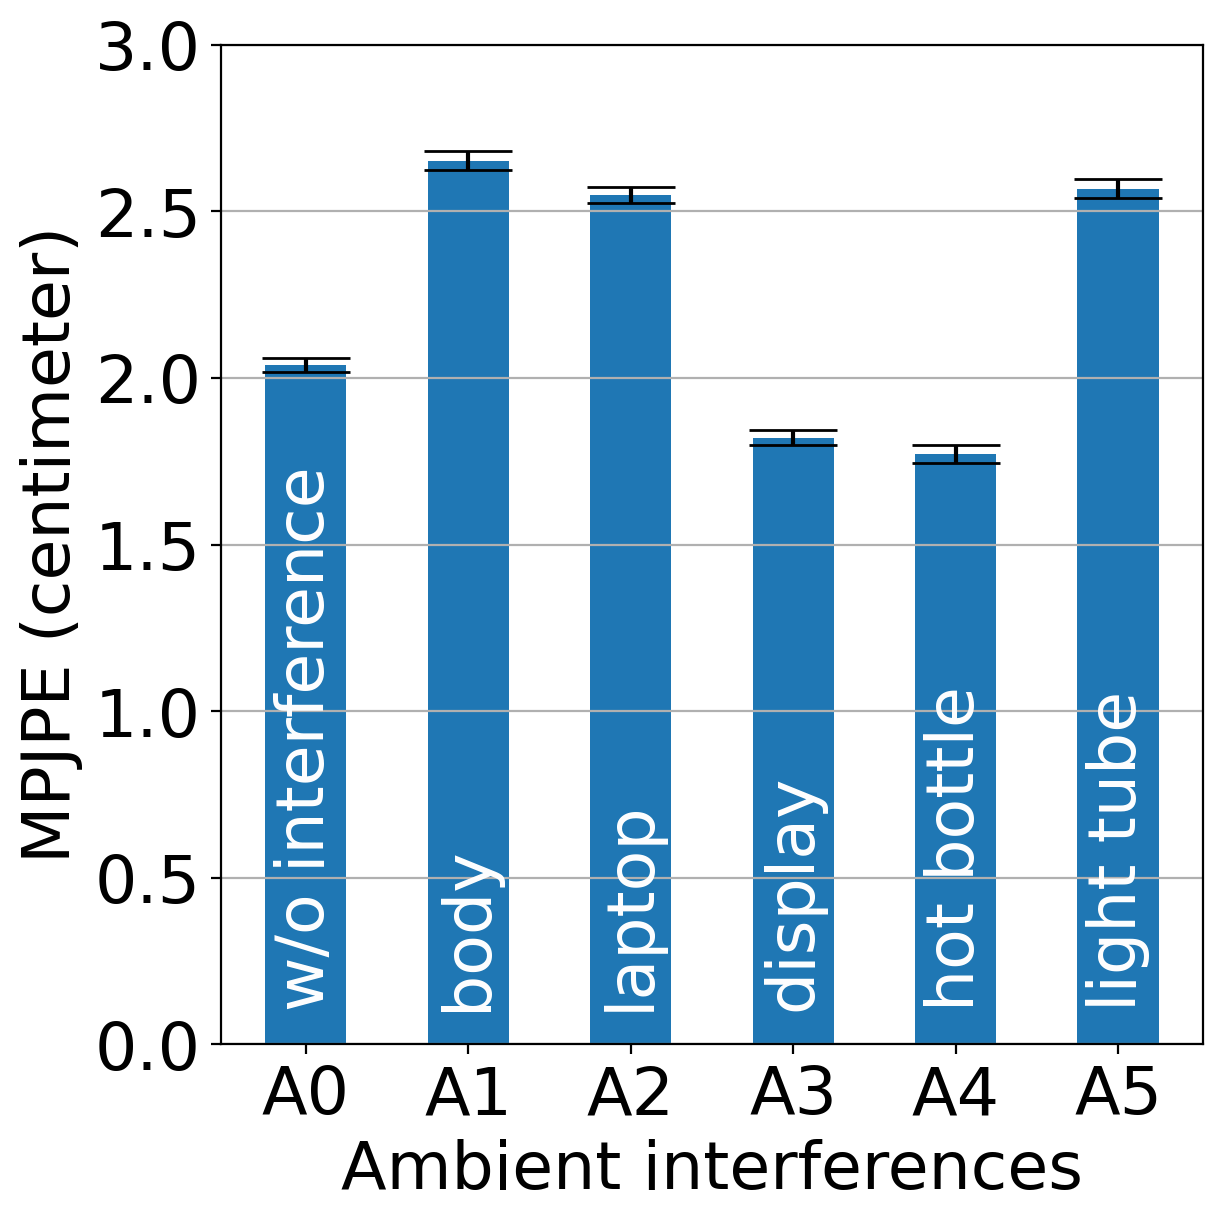

[2.038765, 2.6523132, 2.5486999, 1.8206975, 1.7714905, 2.5679607]
[0.020370461000622734, 0.027570878248865508, 0.023791108373299306, 0.022415962520928277, 0.02784238080809408, 0.028916167462533626]
['w/o interference', 'body', 'laptop', 'display', 'hot bottle', 'light tube']


In [23]:
ambient_interference_files_names = [
    ['P1_empty_R_X_X_0.pkl', 'P1_empty_R_X_X_1.pkl', 'P1_empty_R_X_X_2.pkl', 'P1_empty_R_X_X_3.pkl'],
    ['P1_body_R_X_X_0.pkl', 'P1_body_R_X_X_2.pkl', 'P1_body_R_X_X_3.pkl'], 
    ['P1_laptop_R_X_X_0.pkl', 'P1_laptop_R_X_X_1.pkl', 'P1_laptop_R_X_X_3.pkl'],
    ['P1_display_R_X_X_1.pkl', 'P1_display_R_X_X_2.pkl', 'P1_display_R_X_X_3.pkl'],
    ['P1_hotbottle_R_X_X_0.pkl', 'P1_hotbottle_R_X_X_2.pkl'],
    ['P1_light_R_X_X_1.pkl', 'P1_light_R_X_X_2.pkl', 'P1_light_R_X_X_3.pkl']
    ]


temp_results_mpjpe = []
temp_results_mpjpe_ci = []
dimention_maes = []
pose_error = []

for k, selected_files in enumerate(ambient_interference_files_names):
    result_path = 'Dataset_Ambient_interference_logs/tapor_type1_weights_77_20242421040_tapor.pth_2024620195042_result_dict.pkl'
    result_data = pickle.load(open(result_path, 'rb'))

    infernece_file_name = result_data['infernece_file_name']
    failed_file_names = result_data['failed_file_names']
    predicts = result_data['predicts']
    labels = result_data['labels']

    selected_predicts = []
    selected_labels = []
    if len(selected_files) > 0:
        for i in range(len(infernece_file_name)):
            if infernece_file_name[i] in selected_files:
                selected_predicts.append(predicts[i])
                selected_labels.append(labels[i])
            else:
                pass
    else:
        selected_predicts = predicts
        selected_labels = labels
    predicts = np.concatenate(selected_predicts, axis=0) * 100 # convert to cm unit
    labels = np.concatenate(selected_labels, axis=0)* 100 # convert to cm unit
    
    mean_joints_error_wo_root_drift, mean_root_drift_error = calculate_shift_error(predicts, labels)
    mpjpe, mpjpe_ci = calculate_mpjpe_add_ci(predicts, labels)
    pose_error.append(np.mean(mean_joints_error_wo_root_drift))
    per_dimention_mae = np.mean(np.abs(predicts - labels),axis=0)
    per_dimention_mae = np.mean(per_dimention_mae, axis=0)
    temp_results_mpjpe.append(mpjpe)
    temp_results_mpjpe_ci.append(mpjpe_ci)
    dimention_maes.append(per_dimention_mae)

labels = ['A0', 'A1', 'A2', 'A3', 'A4', 'A5' ]
mpjpelist = temp_results_mpjpe
mpjpelist_std = temp_results_mpjpe_ci
# draw the mpjpe of different users
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (6,6),dpi=200, layout='constrained')
# plt.bar(compare_loss_models, mpjpe_list)
bar = plt.bar(labels, mpjpelist, width=0.5, color='tab:blue')
# plot std of each bar
for i in range(len(mpjpelist)):
    plt.errorbar(labels[i], mpjpelist[i], yerr=mpjpelist_std[i], color='black', capsize=16)
plt.xticks(labels, labels)
# rotate the x labels
# plt.xticks(rotation=45)
# # add text on the bar
labels = ['w/o interference', 'body', 'laptop', 'display', 'hot bottle', 'light tube']
for i in range(len(mpjpelist)):
    plt.text(i, 0.1, labels[i], 
             ha='center', 
             va='bottom', 
             fontsize=24,
             rotation = 'vertical',
             color = 'white',
             )
    
plt.ylabel('MPJPE (centimeter)')
plt.xlabel('Ambient interferences')
plt.ylim(0, 3)
plt.grid(axis='y')
# plt.savefig("figures/new_compare_" +'ambient_interference_mpjpe_bar'+ ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/new_compare_"+'ambient_interference_mpjpe_bar' +'.pdf')
plt.show()

print(mpjpelist)
print(mpjpelist_std)
print(labels)

# Tracking results

In [43]:
import matplotlib.pyplot as plt
from tsmoothie.smoother import KalmanSmoother
from matplotlib.ticker import MaxNLocator
import numpy as np

logpath = 'tracking_logs/'
logfiles = [f for f in os.listdir(logpath) if f.endswith('.pkl')]

kalman_smoother = KalmanSmoother(component='level_trend', 
                                    component_noise={'level':0.001, 'trend':0.00001})
selected_point_pred = 8
selected_point_gt = 8
dists = []

result_data = pickle.load(open(os.path.join(logpath, logfiles[0]), 'rb'))
infernece_file_name = result_data['infernece_file_name']
failed_file_names = result_data['failed_file_names']
predicts = result_data['predicts']
labels = result_data['labels']
selected_files = ['P1_U1_L_random_0.pkl', 
                  'P1_U1_L_random_1.pkl', 
                  'P1_U1_L_random_2.pkl', 
                  'P1_U1_L_random_3.pkl', 
                  'P1_U1_L_random_4.pkl', 
                  'P1_U1_L_random_5.pkl', 
                  'P1_U1_L_random_6.pkl', 
                  'P1_U1_L_random_7.pkl', 
                  'P1_U1_L_random_8.pkl', 
                  'P1_U1_L_random_9.pkl',
                  'P1_U1_R_random_0.pkl', 
                  'P1_U1_R_random_1.pkl', 
                  'P1_U1_R_random_2.pkl', 
                  'P1_U1_R_random_3.pkl', 
                  'P1_U1_R_random_4.pkl', 
                  'P1_U1_R_random_5.pkl', 
                  'P1_U1_R_random_6.pkl', 
                  'P1_U1_R_random_7.pkl', 
                  'P1_U1_R_random_8.pkl', 
                  'P1_U1_R_random_9.pkl', 
                  'P1_U1_R_random_10.pkl', 
                  'P1_U1_R_random_11.pkl', 
                  'P1_U2_R_random_0.pkl', 
                  'P1_U2_R_random_1.pkl', 
                  'P1_U2_R_random_2.pkl', 
                  'P1_U2_R_random_3.pkl', 
                  'P1_U2_R_random_4.pkl', 
                  'P1_U2_R_random_5.pkl', 
                  'P1_U2_R_random_6.pkl', 
                  'P1_U2_R_random_7.pkl', 
                  'P1_U2_R_random_8.pkl', 
                  'P1_U2_R_random_9.pkl', 
                  'P1_U2_R_random_12.pkl', 
                  'P1_U2_R_random_13.pkl', 
                  'P1_U2_R_random_15.pkl', 
                  'P1_U2_R_random_16.pkl', 
                  'P1_U2_R_random_18.pkl', 
                  'P1_U2_R_random_19.pkl', 
                  'P1_U2_R_random_20.pkl', 
                  'P1_U2_R_random_21.pkl'
                  ]

# indexs = [4, 6, 7, 9,10,11,13,14]
indexs = range(1, len(predicts))

for i in indexs:
    if infernece_file_name[i] not in selected_files:
        continue
    pred = predicts[i]
    pred_loc = pred[:,selected_point_pred,:]
    gt_loc = labels[i][:,selected_point_gt,:] 
    kalman_smoother.smooth(pred_loc.T)
    kf_smoothed_pred = kalman_smoother.smooth_data.T
    kalman_smoother.smooth(gt_loc.T)
    kf_smoothed_gt = kalman_smoother.smooth_data.T
    dist = np.linalg.norm(kf_smoothed_gt*100 - kf_smoothed_pred*100, axis=1)
    dists.append(dist)

dists = np.concatenate(dists, axis=0)
print('total dists mean (cm):', np.mean(dists))

total dists mean (cm): 2.6908992952939794
